In [2]:
from normalize import *

/home/rzh/Browser/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/rzh/Browser/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/rzh/Browser/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/rzh/Browser/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/rzh/stpair/backend/server/normalize.py:60: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and wil

leiden-1 Cell number: 6450


/home/rzh/Browser/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


6377 Cells retained after scrublet, 73 cells reomved.


/home/rzh/Browser/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
2024-04-18 08:59:17,977 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-18 08:59:19,085 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-18 08:59:19,115 - harmonypy - INFO - Iteration 1 of 20
2024-04-18 08:59:19,916 - harmonypy - INFO - Iteration 2 of 20
2024-04-18 08:59:20,723 - harmonypy - INFO - Iteration 3 of 20
2024-04-18 08:59:21,529 - harmonypy - INFO - Converged after 3 iterations
/home/rzh/stpair/backend/server/normalize.py:105: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_

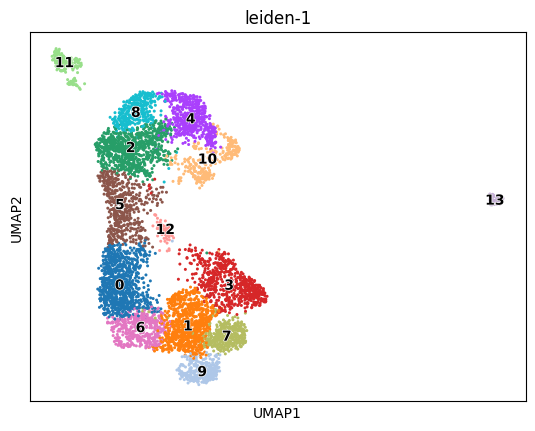

{'Astrocytes': ['11', '8', '2', '4', '5'],
 'Cholinergic neurons': ['13'],
 'Dopaminergic neurons': ['0', '6'],
 'Erythroblasts': ['0', '6'],
 'GABAergic neurons': ['3', '1'],
 'Glycinergic neurons': ['3', '1'],
 'Immature neurons': ['5'],
 'Interneurons': ['3'],
 'Meningeal cells': ['9'],
 'Motor neurons': ['1'],
 'Neural stem/precursor cells': ['3'],
 'Neuroblasts': ['5', '10', '3'],
 'Neurons': ['9', '1', '7', '3', '6'],
 'Oligodendrocyte progenitor cells': ['1', '3'],
 'Pinealocytes': ['0', '5'],
 'Platelets': ['11'],
 'Purkinje neurons': ['3', '1'],
 'Pyramidal cells': ['6', '0'],
 'Radial glia cells': ['8', '4', '2']}

In [2]:
samples = ["/data/rzh/outs/10X12_3_A_1/outs/filtered_feature_bc_matrix.h5",
           "/data/rzh/outs/10X12_4_A_1/outs/filtered_feature_bc_matrix.h5"]
sampleNames = ['dorsal', 'ventral']
organs=['Brain', 'Blood']
adata = concat_adata(samples, sampleNames, inputFunc=input_adata_10Xh5)
adata = pp(adata)
adata = clu(adata)
adata = rank(adata, organs, alpha=10e-50)
adata.uns['UCell_Assign']

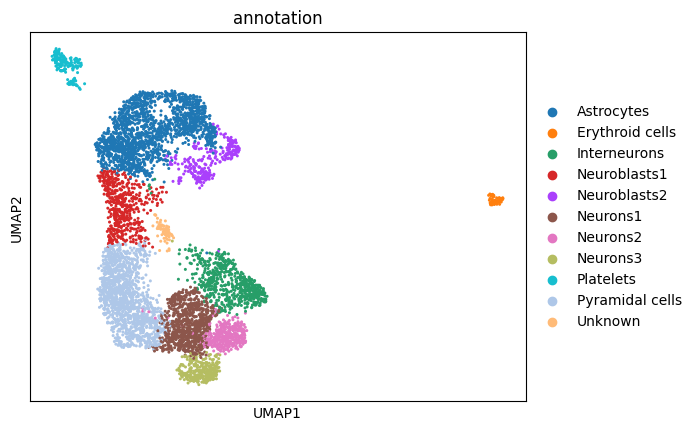

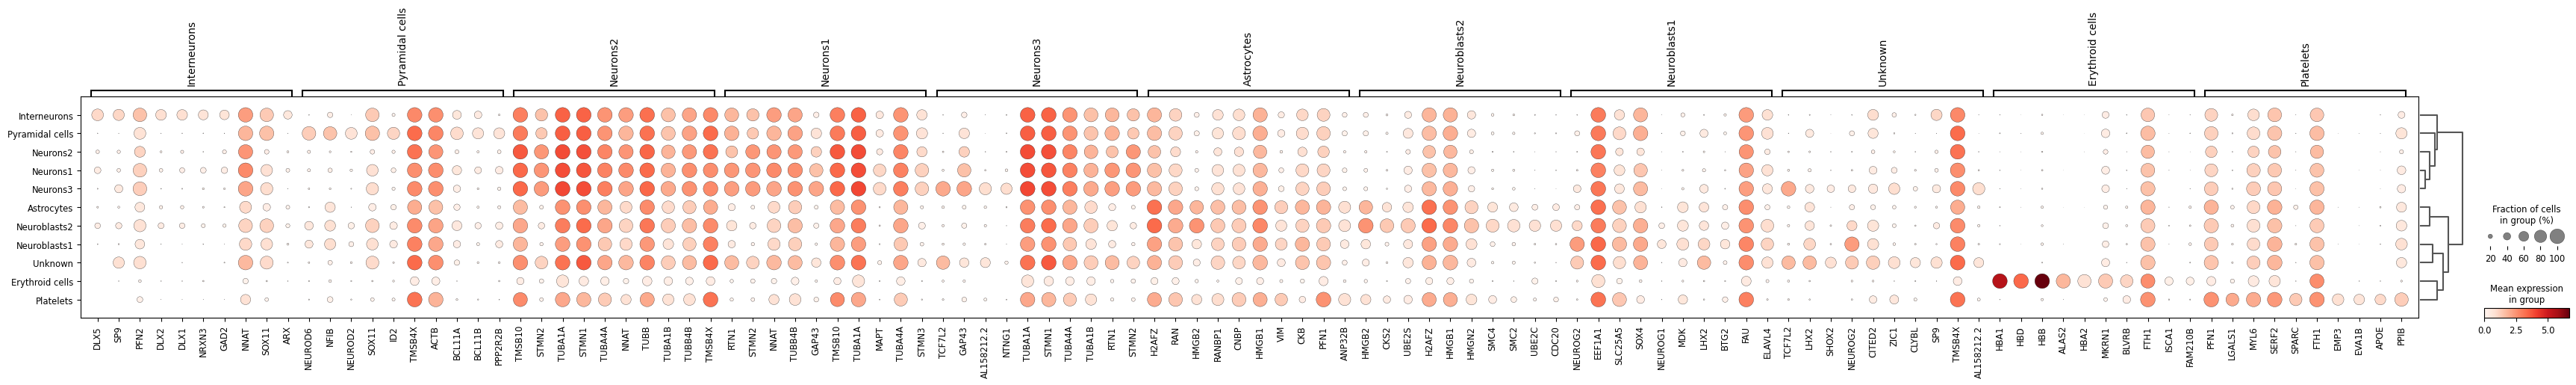

In [6]:
annoDict = {
  'Pyramidal cells': ['6', '0'],
  'Platelets': ['11'],
  'Erythroid cells': ['13'],
  'Interneurons': ['3'],
  'Trigeminal neurons': ['7'],
  'Astrocytes': ['2','8','4'],
  'Neurons1': ['1'], 
  'Neurons2': ['7'], 
  'Neurons3': ['9'], 
  'Neuroblasts1': ['5'],
  'Neuroblasts2': ['10'],
}
adata = anno(adata, annoDict)
sc.pl.umap(adata, color='annotation')
adata = marker(adata)
adata.write_h5ad("/data/rzh/RawUrls/235/sc/sc1.h5ad")

In [18]:
sampleIdx = np.random.choice(len(adata), 3000)
adata.obs.columns = [s.replace('/', ' or ') for s in adata.obs.columns]
adata.obsm['AUCell_rankings'] = np.array(adata.obsm['AUCell_rankings'], dtype=int)
adata0 = adata[sampleIdx,adata.var['highly_variable']].copy()
adata0.write_h5ad("/data/rzh/RawUrls/235/sc/sc1_sampled.h5ad")

In [19]:
adata.obsm['AUCell_rankings']

array([[9656, 2374, 6723, ..., 9900, 9911, 9882],
       [6723, 4354, 7615, ...,  277, 8710, 8729],
       [6723, 4354,   68, ...,  523,  524,  525],
       ...,
       [9656, 2374, 5382, ..., 4148, 4119, 4039],
       [5382, 9656, 5962, ...,  531,  532,  533],
       [2374, 5382, 6723, ...,  528,  529,  530]])

In [ ]:
#Spatial Transcriptomics data analysis

In [4]:
def input_adata_10X(sample):
    adata = sc.read_mtx(sample+'/matrix.mtx.gz')
    adata = adata.T
    bar = pd.read_csv(sample+'/barcodes.tsv.gz', header=None)
    fea = pd.read_csv(sample+'/features.tsv.gz', header=None, sep='\t')
    bar.columns = ['barcodes']
    fea.columns = ['ID', 'name', 'type']
    adata.obs_names = bar.iloc[:,0]
    adata.obs_names_make_unique()
    adata.var = fea
    adata.var_names = fea.iloc[:,1]
    adata.var_names_make_unique()
    adata
    return adata

def input_adata_10Xh5(sample):
    adata = sc.read_10x_h5(sample)
    adata.obs_names_make_unique()
    adata.var_names_make_unique()
    return adata

# 将所有矩阵合并
def concat_adata(samples, sampleNames, inputFunc=input_adata_10Xh5):
    adatas = []
    for i in range(len(sampleNames)):
        adata = inputFunc(samples[i])
        adatas.append(adata)
    if len(adatas) > 0:
        intersection_var = set(adatas[0].var_names)
        for a in adatas[1:]:
            intersection_var &= set(a.var_names)
        common_vars = list(intersection_var)
        for i in range(len(adatas)):
            adatas[i] = adatas[i][:, common_vars]
    # 进行数据合并
    adata_concat = adatas[0].concatenate(adatas[1:], batch_categories=sampleNames)
    adata_concat
    return adata_concat

In [3]:
# 预处理
def pp(adata):
    mito_genes = adata.var_names.str.startswith('MT-')
    # the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
    adata.obs['mt_frac'] = np.sum(
        adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
    
    # 过滤低表达的基因
    sc.pp.filter_cells(adata, min_genes=5)  # 过滤一个细胞中表达少于五个基因的细胞样本 
    sc.pp.filter_genes(adata, min_cells=5)  # 过滤在少于五个细胞中表达的基因
    sc.pp.filter_cells(adata, min_counts=30)   # 过滤每个细胞中计数少于29个的细胞样本 

    # 过滤线粒体核糖体基因
    rp_genes = adata.var_names.str.startswith('RP')
    mt_genes = adata.var_names.str.startswith('MT-')
    adata = adata[:, ~(rp_genes + mt_genes)]
    adata = adata[adata.obs['mt_frac'] < 0.2]
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, n_top_genes=2000)
    return adata

# macro_Mye = scv.read('velo-Macro.h5ad')
def clu(adata, key_added="leiden-1", n_neighbors=50, n_pcs=30, rep='X_pca_harmony', do_har=True, max_iter=20, resolution=1, do_scrublet=True, har_key='batch'):
    # Computing the neighborhood graph
    if do_scrublet:
        n0 = adata.shape[0]
        print("{0} Cell number: {1}".format(key_added, n0))
        sc.pp.scrublet(adata, random_state=112)
        adata = adata[adata.obs['predicted_doublet']==False,:].copy()
        print("{0} Cells retained after scrublet, {1} cells reomved.".format(adata.shape[0], n0-adata.shape[0]))
    else:
        print("Ignoring processing doublet cells...")
    sc.pp.pca(adata, svd_solver='arpack', use_highly_variable=True)
    if do_har:
        sc.external.pp.harmony_integrate(adata, key=har_key,max_iter_harmony=max_iter)
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, use_rep=rep)
    # Run UMAP
    sc.tl.umap(adata)
    sc.tl.leiden(adata, key_added=key_added, resolution=resolution)
    sc.pl.umap(adata, color=key_added, legend_fontoutline=True, palette=sc.pl.palettes.default_20, legend_loc="on data")
    return adata

def marker(adata, groupby="leiden-1", method='wilcoxon'):
    sc.tl.rank_genes_groups(adata, groupby = groupby, method = method)
    sc.tl.dendrogram(adata, groupby=groupby, use_rep='X_pca_harmony')
    sc.pl.rank_genes_groups_dotplot(adata, groupby = groupby)
    return adata

leiden-1 Cell number: 6450
6377 Cells retained after scrublet, 73 cells reomved.


2024-04-11 07:40:18,798 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
Computing initial centroids with sklearn.KMeans...
2024-04-11 07:40:19,958 - harmonypy - INFO - sklearn.KMeans initialization complete.
sklearn.KMeans initialization complete.
2024-04-11 07:40:19,978 - harmonypy - INFO - Iteration 1 of 20
Iteration 1 of 20
2024-04-11 07:40:20,902 - harmonypy - INFO - Iteration 2 of 20
Iteration 2 of 20
2024-04-11 07:40:21,776 - harmonypy - INFO - Iteration 3 of 20
Iteration 3 of 20
2024-04-11 07:40:22,627 - harmonypy - INFO - Converged after 3 iterations
Converged after 3 iterations
... storing 'feature_types' as categorical
... storing 'genome' as categorical


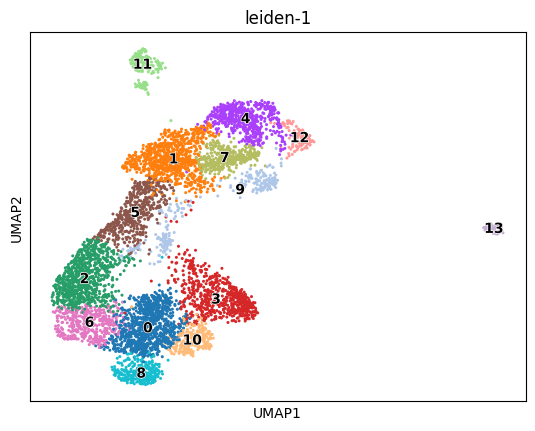

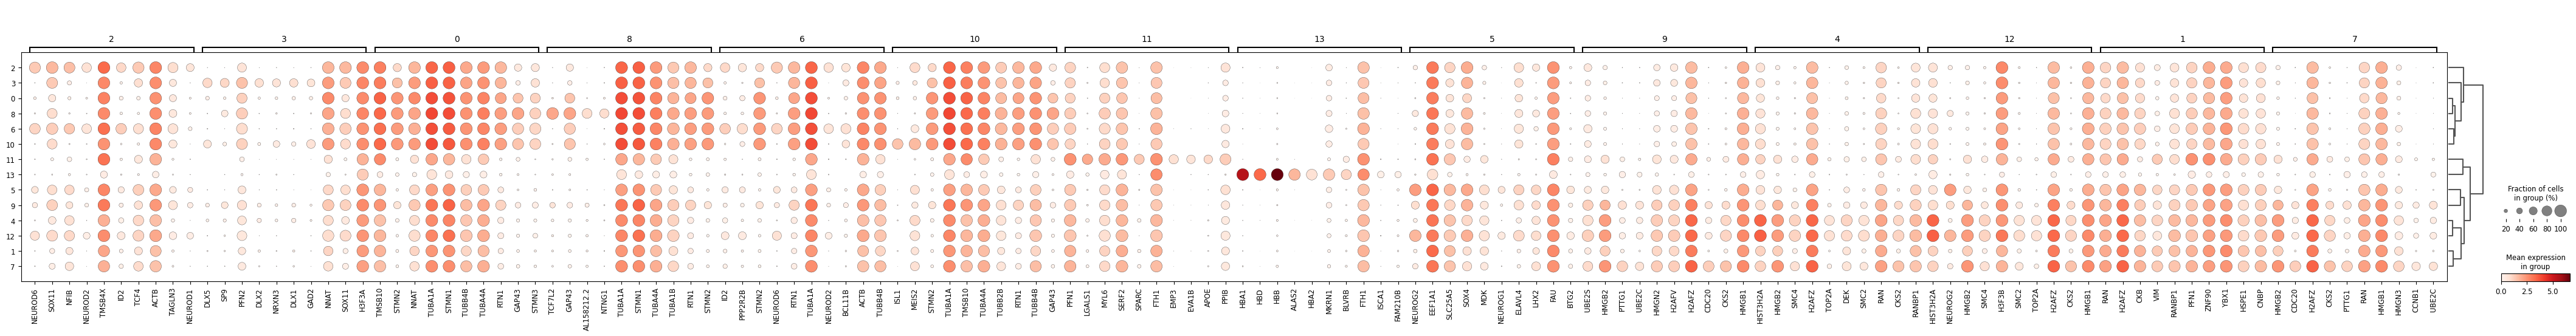

In [6]:
samples = ["/data/rzh/outs/10X12_3_A_1/outs/filtered_feature_bc_matrix.h5",
           "/data/rzh/outs/10X12_4_A_1/outs/filtered_feature_bc_matrix.h5"]
sampleNames = ['dorsal', 'ventral']
adata = concat_adata(samples, sampleNames, inputFunc=input_adata_10Xh5)
adata = pp(adata)
adata = clu(adata)
adata = marker(adata)

In [36]:
adata = sc.read_h5ad("../resources/testAUCell.h5ad")
adata

AnnData object with n_obs × n_vars = 6397 × 11090
    obs: 'batch', 'mt_frac', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden-1'
    var: 'ID', 'name', 'type', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_leiden-1', 'hvg', 'leiden-1', 'leiden-1_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
def partition_arg_topK(matrix, K, axis=1):
    """
    perform topK based on np.argpartition
    :param matrix: to be sorted
    :param K: select and sort the top K items
    :param axis: 0 or 1. dimension to be sorted.
    :return:
    """
    a_part = np.argpartition(matrix, K, axis=axis)
    if axis == 0:
        row_index = np.arange(matrix.shape[1 - axis])
        a_sec_argsort_K = np.argsort(matrix[a_part[0:K, :], row_index], axis=axis)
        return a_part[0:K, :][a_sec_argsort_K, row_index]
    else:
        column_index = np.arange(matrix.shape[1 - axis])[:, None]
        a_sec_argsort_K = np.argsort(matrix[column_index, a_part[:, 0:K]], axis=axis)
        return a_part[:, 0:K][column_index, a_sec_argsort_K]
    
def naive_topK(matrix, K, axis=1):
    mat = np.argsort(-matrix, axis=axis)
    return mat[:, :K]


adata.obsm['AUCell_rankings'] = pd.DataFrame(naive_topK(adata.X.todense(), k), index=adata.obs_names)

In [6]:
def naive_topK(matrix, K, axis=1):
    mat = np.argsort(-matrix, axis=axis)
    return mat[:, :K]
k = int(len(adata.var_names)*0.05)
adata.obsm['AUCell_rankings'] = pd.DataFrame(naive_topK(adata.X.todense(), k), index=adata.obs_names)

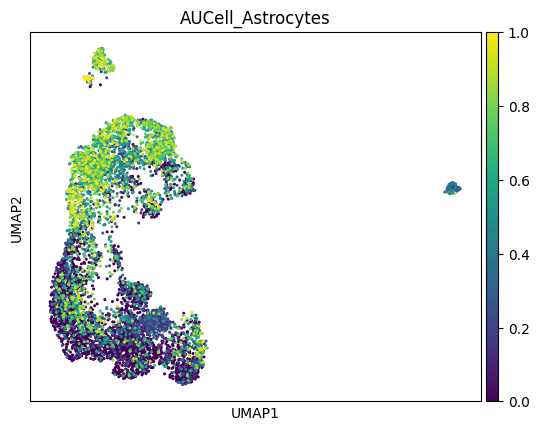

In [7]:
markerList = np.array(["S100B", "SLC1A2", "GFAP", "BYSL", "ALDH1L1", "CD40", "SLC1A3", "FGFR3", "GJB6", "AQP4", "HTRA1", "S100A8", "CLDN10", "ITIH3", "NKAIN4", "ACSL6", "ACSBG1", "TRIL", "AGT", "GPR37L1", "SLC4A4", "NTSR2", "SLC6A11", "HSPA2", "SLC16A2", "SYNE1", "DIO2", "SLC7A10", "ENTPD2", "HSPB6", "PLXNB1", "LCAT", "PLA2G7", "CMTM5", "S1PR1", "SLC39A12", "LUZP2", "GSTA4", "SLC25A28", "SLC25A46", "WNT3", "FZD2", "TEAD1", "RLBP1", "ALDOC", "GJA1", "APOE", "LCN2", "SOX9", "VIM", "CCR7", "AANAT", "FABP7", "SOCS3", "SYNM", "HMG20A", "NFATC3", "SRR", "SLC1A6", "ETS1", "SLIT1", "SNPH", "IL23A"])
markerList = list(set(markerList).intersection(set(adata.var_names)))
from sklearn.metrics import roc_auc_score
y_score = list(range(len(adata.obsm['AUCell_rankings'].columns)))
y_score.reverse()
aucell = np.zeros_like(adata.obs_names)
for i in range(len(adata.obsm['AUCell_rankings'])):
  y_test = adata.var_names[adata.obsm['AUCell_rankings'].iloc[i,:]].isin(markerList)
  if sum(y_test) == 0:
    aucell[i] = 0
  else:
    aucell[i] = roc_auc_score(y_test, y_score)
adata.obs["AUCell_Astrocytes"] = aucell
sc.pl.umap(adata, color="AUCell_Astrocytes")

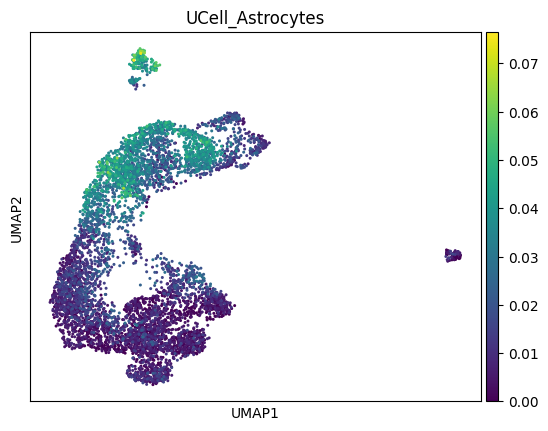

In [8]:
def AUCell_calcUC(adata:ad.AnnData, markerList:list, cellType:str, rankings="AUCell_rankings"):
  varList = list(adata.var_names)
  markerIdx = [varList.index(s) for s in markerList]
  rankMat = adata.obsm[rankings]
  maxRank = len(adata.obsm[rankings].columns)
  n = len(markerIdx)
  smin = n*(n+1)/2
  smax = n*maxRank
  umax = smax - smin
  ucell = np.zeros_like(adata.obs_names)
  for i in range(len(rankMat)):
    mat = rankMat.iloc[i, :]
    intagIdx = mat[mat.isin(markerIdx)]
    if len(intagIdx) == 0:
       ucell[i]=0
    else:
      u = np.sum([list(mat).index(s) for s in intagIdx]) + (n-len(intagIdx))*maxRank - smin
      ucell[i] = 1 - u / umax

  # do knn-smooth
  ucellSmm = np.zeros_like(adata.obs_names)
  knnMat = np.argsort(-adata.obsp["connectivities"].todense(), axis=1)[:,:5]
  for i in range(len(ucell)):
    knnCells = list(knnMat[i])
    ucellSmm[i] = np.mean(ucell[knnCells])
  adata.obs[f"UCell_{cellType}"] = ucellSmm
  return adata

markerList = np.array(["S100B", "SLC1A2", "GFAP", "BYSL", "ALDH1L1", "CD40", "SLC1A3", "FGFR3", "GJB6", "AQP4", "HTRA1", "S100A8", "CLDN10", "ITIH3", "NKAIN4", "ACSL6", "ACSBG1", "TRIL", "AGT", "GPR37L1", "SLC4A4", "NTSR2", "SLC6A11", "HSPA2", "SLC16A2", "SYNE1", "DIO2", "SLC7A10", "ENTPD2", "HSPB6", "PLXNB1", "LCAT", "PLA2G7", "CMTM5", "S1PR1", "SLC39A12", "LUZP2", "GSTA4", "SLC25A28", "SLC25A46", "WNT3", "FZD2", "TEAD1", "RLBP1", "ALDOC", "GJA1", "APOE", "LCN2", "SOX9", "VIM", "CCR7", "AANAT", "FABP7", "SOCS3", "SYNM", "HMG20A", "NFATC3", "SRR", "SLC1A6", "ETS1", "SLIT1", "SNPH", "IL23A"])
markerList = list(set(markerList).intersection(set(adata.var_names)))
AUCell_calcUC(adata, markerList, "Astrocytes")
sc.pl.umap(adata, color="UCell_Astrocytes")

In [22]:
np.argsort(-adata.obsp["connectivities"].todense(), axis=1)[:,:5]

matrix([[4932,  328, 1357, 2005, 4572],
        [2059, 6040, 1119, 2552, 1663],
        [ 965, 3570, 1074, 3229, 4992],
        ...,
        [5703, 3736, 4619, 2673, 2923],
        [2805, 5821, 3928, 2872, 2741],
        [5814, 2563,  699, 5204,  587]])

In [83]:
def AUCell_exploreThreshold(adata:ad.AnnData, cellType:str, assign=True, index="AUCell"):
  aucell = adata.obs[f'{index}_{cellType}']
  bins = np.array(range(10))/10 * np.max(aucell)
  hist = np.histogram(aucell, bins=bins)[0]
  total = len(aucell)
  mean = np.mean(aucell)

  w0, u0, w1, u1, u = 0, 0, 0, 0, 0
  max_variance = 0.0
  threshold = 0
  for i,t in enumerate(bins):
    # 阈值为t时的类间方差计算
    w0 = np.sum(hist[:i]) / total
    w1 = 1 - w0
    if w0 == 0 or w1 == 0:
        continue
    
    u0 = np.sum(hist[:i] * bins[1:i+1]) / w0
    u1 = np.sum(hist[i:] * bins[i+1:]) / w1
    u = u0 * w0 + u1 * w1
    # 类内方差
    var_b = w0 * (u0 - mean) ** 2 + w1 * (u1 - mean) ** 2
    if var_b > max_variance:
        max_variance = var_b
        threshold = t
  
  # add to adata.uns
  if 'AUCThreshold' not in adata.uns:
    adata.uns['AUCThreshold'] = {}
  adata.uns['AUCThreshold'][cellType] = threshold
  if assign:
    assign = aucell[aucell >= threshold] 
    assign.iloc[:] = cellType
    adata.obs[f'{index}_{cellType}_Assignment'] = assign
  print(f"threshold of {cellType} is {threshold}")
  return adata

In [90]:
panglaoDB = pd.read_csv("../resources/PanglaoDB_markers_27_Mar_2020.tsv", sep='\t')
panglaoDB

species official gene symbol                     cell type  \
0      Mm Hs                CTRB1                  Acinar cells   
1      Mm Hs                 KLK1                  Acinar cells   
2      Mm Hs                RBPJL                  Acinar cells   
3      Mm Hs                PTF1A                  Acinar cells   
4         Mm                 TRY4                  Acinar cells   
...      ...                  ...                           ...   
8281   Mm Hs                MYH11  Vascular smooth muscle cells   
8282   Mm Hs               PDGFRB  Vascular smooth muscle cells   
8283   Mm Hs               SEMA3D  Vascular smooth muscle cells   
8284   Mm Hs                TBX18  Vascular smooth muscle cells   
8285   Mm Hs                  WT1  Vascular smooth muscle cells   

                      nicknames  ubiquitousness index  \
0                          CTRB                 0.017   
1                          Klk6                 0.013   
2            RBP-L|SUHL|RBPSUHL                 0.001   
3              PTF1-p48|bHLHa29                 0.001   
4                           NaN                 0.007   
...                         ...                   ...   
8281                 SMMHC|SMHC                 0.015   
8282  JTK12|CD140b|PDGFR1|PDGFR                 0.033   
8283             coll-2|Sema-Z2                 0.005   
8284                        NaN                 0.004   
8285       WIT-2|AWT1|NPHS4|GUD                 0.010   

                                    product description            gene type  \
0                                   chymotrypsinogen B1  protein-coding gene   
1                                          kallikrein 1  protein-coding gene   
2     recombination signal binding protein for immun...  protein-coding gene   
3           pancreas associated transcription factor 1a  protein-coding gene   
4                                             trypsin 4  protein coding gene   
...                                                 ...                  ...   
8281                              myosin heavy chain 11  protein-coding gene   
8282       platelet derived growth factor receptor beta  protein-coding gene   
8283                                      semaphorin 3D  protein-coding gene   
8284                                           T-box 18  protein-coding gene   
8285                                      Wilms tumor 1  protein-coding gene   

      canonical marker germ layer          organ  sensitivity_human  \
0                  1.0   Endoderm       Pancreas           1.000000   
1                  1.0   Endoderm       Pancreas           0.833333   
2                  1.0   Endoderm       Pancreas           0.000000   
3                  1.0   Endoderm       Pancreas           0.000000   
4                  1.0   Endoderm       Pancreas                NaN   
...                ...        ...            ...                ...   
8281               NaN   Mesoderm  Smooth muscle           0.000000   
8282               NaN   Mesoderm  Smooth muscle           0.000000   
8283               NaN   Mesoderm  Smooth muscle           0.000000   
8284               NaN   Mesoderm  Smooth muscle           0.000000   
8285               NaN   Mesoderm  Smooth muscle           0.000000   

      sensitivity_mouse  specificity_human  specificity_mouse  
0              0.957143           0.000629           0.015920  
1              0.314286           0.005031           0.012826  
2              0.000000           0.000000           0.000000  
3              0.157143           0.000629           0.000773  
4                   NaN                NaN                NaN  
...                 ...                ...                ...  
8281           1.000000           0.016291           0.014697  
8282           0.750000           0.036341           0.033246  
8283           0.000000           0.001253           0.000000  
8284           0.000000           0.000313           0.000000

In [96]:
organ = pd.unique(panglaoDB['organ'].dropna())
organ.sort()
organ

array(['Adrenal glands', 'Blood', 'Bone', 'Brain', 'Connective tissue',
       'Embryo', 'Epithelium', 'Eye', 'GI tract', 'Heart',
       'Immune system', 'Kidney', 'Liver', 'Lungs', 'Mammary gland',
       'Olfactory system', 'Oral cavity', 'Pancreas',
       'Parathyroid glands', 'Placenta', 'Reproductive',
       'Skeletal muscle', 'Skin', 'Smooth muscle', 'Thymus', 'Thyroid',
       'Urinary bladder', 'Vasculature', 'Zygote'], dtype=object)

In [218]:
celltype = pd.unique(panglaoDB[panglaoDB['organ'].isin(['Blood', 'Brain'])]['cell type'].dropna())
celltype.sort()
celltype

array(['Adrenergic neurons', 'Anterior pituitary gland cells',
       'Astrocytes', 'Bergmann glia', 'Cajal-Retzius cells',
       'Cholinergic neurons', 'Choroid plexus cells',
       'Dopaminergic neurons', 'Ependymal cells', 'Erythroblasts',
       'Erythroid-like and erythroid precursor cells',
       'GABAergic neurons', 'Glutaminergic neurons',
       'Glycinergic neurons', 'Immature neurons', 'Interneurons',
       'Meningeal cells', 'Microglia', 'Motor neurons',
       'Neural stem/precursor cells', 'Neuroblasts',
       'Neuroendocrine cells', 'Neurons', 'Noradrenergic neurons',
       'Oligodendrocyte progenitor cells', 'Oligodendrocytes',
       'Pinealocytes', 'Platelets', 'Purkinje neurons', 'Pyramidal cells',
       'Radial glia cells', 'Reticulocytes', 'Retinal ganglion cells',
       'Satellite glial cells', 'Schwann cells', 'Serotonergic neurons',
       'Tanycytes', 'Trigeminal neurons'], dtype=object)

In [108]:
def AUCell_calcAUC(adata:ad.AnnData, markerList:list, cellType:str, rankings="AUCell_rankings"):
  markerSet = list(set(markerList).intersection(set(adata.var_names)))
  if rankings in adata.obsm:
    y_score = list(range(len(adata.obsm['AUCell_rankings'].columns)))
    y_score.reverse()
    aucell = np.zeros_like(adata.obs_names)
    for i in range(len(adata.obsm['AUCell_rankings'])):
      y_test = adata.var_names[adata.obsm['AUCell_rankings'].iloc[i,:]].isin(markerSet)
      if sum(y_test) == 0:
        aucell[i] = 0
      else:
        aucell[i] = roc_auc_score(y_test, y_score)
    adata.obs[f"AUCell_{cellType}"] = aucell
  else:
    print(f"{rankings} not found in adata.obsm, run AUCell_buildRankings first.")
  return adata

... storing 'UCell_Pyramidal cells_Assignment' as categorical


threshold of Pyramidal cells is 0.03257039811346927


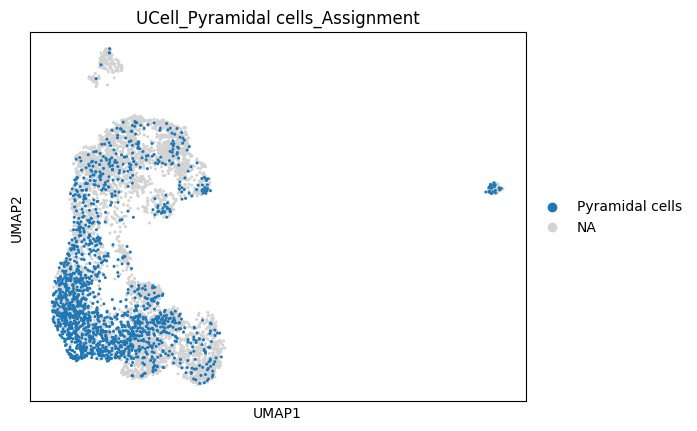

In [138]:
markerList = np.array(panglaoDB[panglaoDB['cell type'] =='Pyramidal cells']['official gene symbol'])
markerList = list(set(markerList).intersection(set(adata.var_names)))
adata = AUCell_calcUC(adata, markerList, "Pyramidal cells")
adata = AUCell_exploreThreshold(adata, "Pyramidal cells", index="UCell")
sc.pl.umap(adata, color="UCell_Pyramidal cells_Assignment")

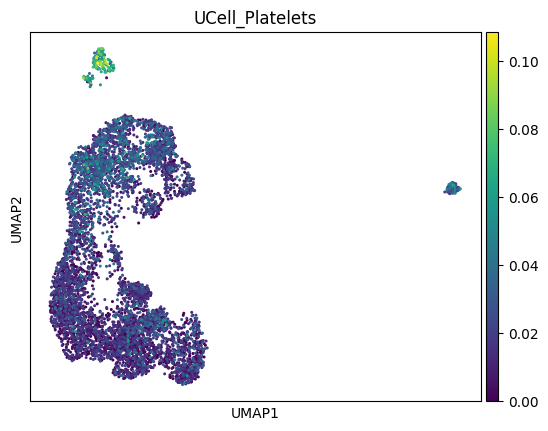

In [135]:
sc.pl.umap(adata, color="UCell_Platelets")

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

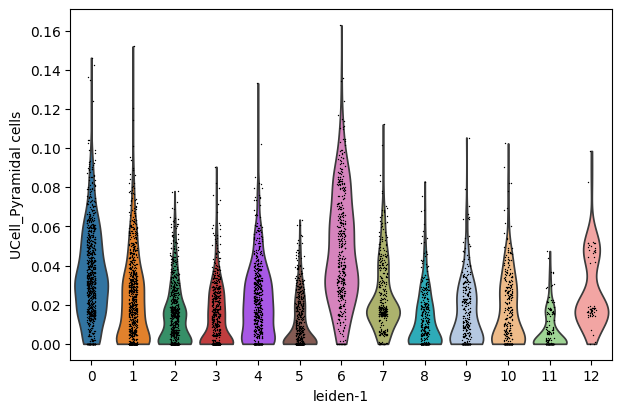

In [171]:
sc.pl.violin(adata, keys="UCell_Pyramidal cells", groupby="leiden-1")

In [196]:
from scipy.stats import wilcoxon, mannwhitneyu, ks_2samp, kruskal

sample1 = adata.obs.loc[adata.obs['leiden-1'].isin(['5']), "UCell_Pyramidal cells"]
sample2 = adata.obs.loc[~adata.obs['leiden-1'].isin(['5']), "UCell_Pyramidal cells"]

samples = adata.obs[['leiden-1', "UCell_Pyramidal cells"]].groupby('leiden-1')

w = kruskal(sample1, sample2)
w

KruskalResult(statistic=164.32322712666542, pvalue=1.2857345452593937e-37)

In [227]:
def AUCell_UCAssign(adata:ad.AnnData, db:pd.DataFrame, celltype:str, alpha=10e-40, gene_col='official gene symbol'):
  annotation = {}
  for ct in celltype:
    candidates = []
    alpha=10e-40
    markerList = np.array(db[db['cell type'] ==ct][gene_col])
    markerList = list(set(markerList).intersection(set(adata.var_names)))
    adata = AUCell_calcUC(adata, markerList, ct)
    ucell = adata.obs[["leiden-1", f"UCell_{ct}"]]
    rank = ucell.groupby("leiden-1").mean()
    rank = rank.sort_values(by=f"UCell_{ct}", ascending=False)
    rank = rank.reset_index()

    for i in range(len(rank)):
      anno = rank.iloc[i,0]
      sample1 = ucell.loc[ucell['leiden-1'].isin([anno]), f"UCell_{ct}"]
      sample2 = ucell.loc[~ucell['leiden-1'].isin([anno]), f"UCell_{ct}"]
      w = kruskal(sample1, sample2)
      if w.pvalue < alpha:
        candidates.append(anno)
        ucell = ucell[~ucell['leiden-1'].isin([anno])]
      else:
        break
    if len(candidates) > 0:
      annotation[ct] = candidates
  adata.uns['UCell_Assign'] = annotation
  return adata

In [228]:
adata = AUCell_UCAssign(adata,panglaoDB,celltype)
adata

AnnData object with n_obs × n_vars = 6377 × 10965
    obs: 'batch', 'mt_frac', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden-1', 'AUCell_Astrocytes', 'UCell_Astrocytes', 'AUCell_Astrocytes_Assignment', 'UCell_Astrocytes_Assignment', 'UCell_Interneuron', 'UCell_Interneuron_Assignment', 'UCell_Microglia', 'UCell_Microglia_Assignment', 'AUCell_Microglia', 'AUCell_Microglia_Assignment', 'UCell_Neurons', 'UCell_Neurons_Assignment', 'UCell_Oligodendrocytes', 'UCell_Oligodendrocytes_Assignment', 'UCell_Pyramidal cells', 'UCell_Pyramidal cells_Assignment', 'UCell_Platelets', 'UCell_Platelets_Assignment', 'UCell_Ependymal cells', 'UCell_Ependymal cells_Assignment', 'UCell_Schwann cells', 'UCell_Schwann cells_Assignment', 'UCell_Neuroblasts', 'UCell_Neuroblasts_Assignment', 'UCell_Interneurons', 'UCell_Reticulocytes', 'UCell_Adrenergic neurons', 'UCell_Anterior pituitary gland cells', 'UCell_Bergmann glia', 'UCell_Cajal-Retzius cells', 'UCell_Cholinergic neurons', 'UCell_C

In [232]:
panglaoDB[panglaoDB['cell type'] == 'B cells naive']

species official gene symbol      cell type  \
597   Mm Hs                 CD19  B cells naive   
598   Mm Hs                  CD2  B cells naive   
599   Mm Hs                 CD72  B cells naive   
600   Mm Hs                IL2RA  B cells naive   
601   Mm Hs                  MME  B cells naive   
..      ...                  ...            ...   
661   Mm Hs            TNFRSF13C  B cells naive   
662      Hs            LINC00926  B cells naive   
663   Mm Hs                STAG3  B cells naive   
664   Mm Hs                BIRC3  B cells naive   
665   Mm Hs                 CD74  B cells naive   

                                     nicknames  ubiquitousness index  \
597                                        NaN                 0.007   
598                                        NaN                 0.040   
599                                 LYB2|CD72b                 0.003   
600                                IL2R|IDDM10                 0.009   
601                                 CALLA|CD10                 0.017   
..                                         ...                   ...   
661                                BAFFR|CD268                 0.008   
662                                        NaN                 0.003   
663                                        NaN                 0.006   
664  cIAP2|hiap-1|MIHC|RNF49|MALT2|c-IAP2|API2                 0.026   
665                                      DHLAG                 0.169   

                            product description            gene type  \
597                               CD19 molecule  protein-coding gene   
598                                CD2 molecule  protein-coding gene   
599                               CD72 molecule  protein-coding gene   
600        interleukin 2 receptor subunit alpha  protein-coding gene   
601               membrane metalloendopeptidase  protein-coding gene   
..                                          ...                  ...   
661         TNF receptor superfamily member 13C  protein-coding gene   
662  long intergenic non-protein coding RNA 926       non-coding RNA   
663                           stromal antigen 3  protein-coding gene   
664         baculoviral IAP repeat containing 3  protein-coding gene   
665                               CD74 molecule  protein-coding gene   

     canonical marker germ layer          organ  sensitivity_human  \
597               1.0   Mesoderm  Immune system           0.000000   
598               NaN   Mesoderm  Immune system           0.000000   
599               1.0   Mesoderm  Immune system           0.000000   
600               NaN   Mesoderm  Immune system           0.000000   
601               NaN   Mesoderm  Immune system           0.000000   
..                ...        ...            ...                ...   
661               1.0   Mesoderm  Immune system           0.933333   
662               1.0   Mesoderm  Immune system           0.933333   
663               1.0   Mesoderm  Immune system           0.066667   
664               1.0   Mesoderm  Immune system           0.533333   
665               1.0   Mesoderm  Immune system           1.000000   

     sensitivity_mouse  specificity_human  specificity_mouse  
597                0.0           0.007869           0.006096  
598                0.0           0.094429           0.029644  
599                0.0           0.001889           0.002823  
600                0.0           0.020145           0.006737  
601                0.0           0.027070           0.015014  
..                 ...                ...                ...  
661                0.0           0.014794           0.000000  
662                0.0           0.011331           0.000000  
663                0.0           0.018256           0.000000  
664                0.0           0.081209           0.014886  
665                0.0           0.360718           0.125184  

[69 rows x 14 columns]

In [242]:
panglaoDB[panglaoDB['official gene symbol'].isin(['B3GALT6', 'CCNL2', 'MS4A1',
                                                  'FNDC10', 'CDK11A', 
                                                  'CDK11B', 'GNB1', 
                                                  'CASP9', 'PGD',
                                                  'MIIP', 'MRPL20-AS1','SLC35E2A', 'CALML6', 'PRKCZ', 'PRXL2B', 'NMNAT1'])]

species official gene symbol            cell type        nicknames  \
423    Mm Hs                MS4A1              B cells  Bp35|MS4A2|CD20   
578    Mm Hs                MS4A1       B cells memory  Bp35|MS4A2|CD20   
638    Mm Hs                MS4A1        B cells naive  Bp35|MS4A2|CD20   
3034   Mm Hs                PRKCZ  Gastric chief cells             PKC2   
6098   Mm Hs                PRKCZ     Oligodendrocytes             PKC2   
6561   Mm Hs                MS4A1         Plasma cells  Bp35|MS4A2|CD20   

      ubiquitousness index             product description  \
423                  0.014  membrane spanning 4-domains A1   
578                  0.014  membrane spanning 4-domains A1   
638                  0.014  membrane spanning 4-domains A1   
3034                 0.022           protein kinase C zeta   
6098                 0.022           protein kinase C zeta   
6561                 0.014  membrane spanning 4-domains A1   

                gene type  canonical marker germ layer          organ  \
423   protein-coding gene               1.0   Mesoderm  Immune system   
578   protein-coding gene               1.0   Mesoderm  Immune system   
638   protein-coding gene               1.0   Mesoderm  Immune system   
3034  protein-coding gene               1.0   Endoderm       GI tract   
6098  protein-coding gene               1.0   Ectoderm          Brain   
6561  protein-coding gene               1.0   Mesoderm  Immune system   

      sensitivity_human  sensitivity_mouse  specificity_human  \
423            0.483871           0.620155           0.011182   
578            0.000000           0.000000           0.020363   
638            1.000000           0.000000           0.015738   
3034           0.000000           0.000000           0.000000   
6098           0.000000           0.203753           0.000000   
6561           0.000000           0.000000           0.020596   

      specificity_mouse  
423            0.001566  
578            0.011806  
638            0.011806  
3034           0.028104  
6098           0.019273  
6561           0.011807

In [244]:
adata.uns['UCell_Assign']

{'Astrocytes': ['11', '2', '8', '5'],
 'Erythroid-like and erythroid precursor cells': ['12'],
 'GABAergic neurons': ['3', '1', '7'],
 'Glutaminergic neurons': ['0', '5'],
 'Glycinergic neurons': ['3', '1'],
 'Immature neurons': ['4', '6', '0'],
 'Meningeal cells': ['9'],
 'Microglia': ['11'],
 'Motor neurons': ['1', '3'],
 'Neural stem/precursor cells': ['3', '4', '10', '5', '2'],
 'Neuroblasts': ['4', '10', '3', '9'],
 'Neurons': ['9', '1', '7', '3'],
 'Oligodendrocyte progenitor cells': ['1', '3', '9', '7', '6', '0'],
 'Platelets': ['11'],
 'Purkinje neurons': ['3'],
 'Pyramidal cells': ['6', '0'],
 'Radial glia cells': ['5', '8', '2', '4'],
 'Retinal ganglion cells': ['1'],
 'Tanycytes': ['4']}

... storing 'annotation' as categorical


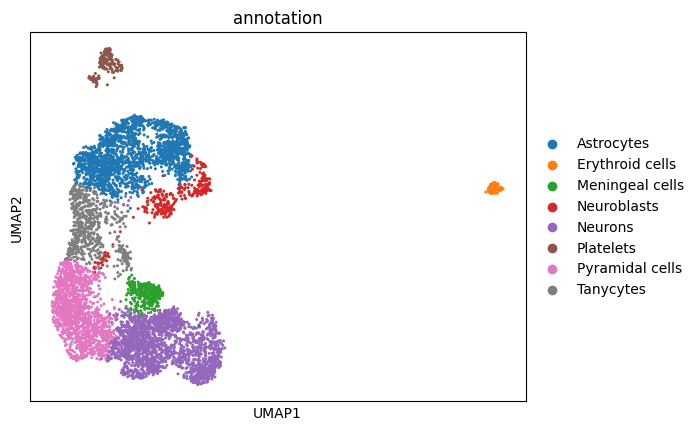

In [246]:
annoDict = {
  'Pyramidal cells': ['6', '0'],
  'Platelets': ['11'],
  'Erythroid cells': ['12'],
  'Astrocytes': ['2', '8', '5'],
  'Meningeal cells': ['9'],
  'Neurons': ['1', '7', '3'],
  'Tanycytes': ['4'],
  'Neuroblasts': ['10'],
}

def anno(adata:ad.AnnData, annoDict:dict):
  adata.obs['annotation'] = 'Unknown'
  for key in annoDict.keys():
    adata.obs.loc[adata.obs['leiden-1'].isin(annoDict[key]), 'annotation'] = key
  return adata

adata = anno(adata, annoDict)
sc.pl.umap(adata, color='annotation')

In [ ]:
adata_sc = sc.read_h5ad("/data/rzh/RawUrls/235/sc/sc1.h5ad")
samples = ["/data/rzh/RawUrls/235/sp/Control02.h5ad",
           "/data/rzh/RawUrls/235/sp/Control05.h5ad",
           "/data/rzh/RawUrls/235/sp/Control06.h5ad",
           "/data/rzh/RawUrls/235/sp/Control09.h5ad"]
sampleNames = ['Control02', 'Control05', 'Control06', 'Control09']
organs=['Brain', 'Blood']
adata_sp = concat_adata(samples, sampleNames, inputFunc=input_adata_h5ad)
adata_sp.var_names = [s.upper() for s in adata_sp.var_names]
adata_sp = pp(adata_sp)
adata_sp = clu(adata_sp)
adata_sp = rank(adata_sp, organs=organs, alpha=10e-40)
adata_sp = marker(adata_sp, groupby='leiden-1')
adata_sp.obs['annotation'] = adata_sp.obs['leiden-1']
adata_sp.obs.columns = [s.replace('/', ' or ') for s in adata_sp.obs.columns]
weight = Cell2Location_run(adata_sc, adata_sp)
adata_sp.obsm['Cell2Location'] = weight
adata0_sp = adata_sp[:,adata_sp.var['highly_variable']].copy()
adata0_sp.write_h5ad("/data/rzh/RawUrls/235/sp/sp1-deconv.h5ad")

In [19]:
adata0_sp

AnnData object with n_obs × n_vars = 4597 × 2000
    obs: 'in_tissue', 'array_row', 'array_col', 'X', 'Y', 'cell_type', 'Apical_vs_Basal_annotation', 'Cx_vs_LGE_annotation', 'LGE_VZ_vs_SVZ_annotation', 'batch', 'mt_frac', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden-1', 'UCell_Adrenergic neurons', 'UCell_Anterior pituitary gland cells', 'UCell_Astrocytes', 'UCell_Bergmann glia', 'UCell_Cajal-Retzius cells', 'UCell_Cholinergic neurons', 'UCell_Choroid plexus cells', 'UCell_Dopaminergic neurons', 'UCell_Ependymal cells', 'UCell_Erythroblasts', 'UCell_Erythroid-like and erythroid precursor cells', 'UCell_GABAergic neurons', 'UCell_Glutaminergic neurons', 'UCell_Glycinergic neurons', 'UCell_Immature neurons', 'UCell_Interneurons', 'UCell_Meningeal cells', 'UCell_Microglia', 'UCell_Motor neurons', 'UCell_Neural stem or precursor cells', 'UCell_Neuroblasts', 'UCell_Neuroendocrine cells', 'UCell_Neurons', 'UCell_Noradrenergic neurons', 'UCell_Oligodendrocyte progenitor

In [20]:
adata0_sp.obs = pd.concat([adata0_sp.obs, adata0_sp.obsm['Cell2Location']],axis=1)
del adata0_sp.obsm['Cell2Location']

AnnData object with n_obs × n_vars = 4597 × 2000
    obs: 'in_tissue', 'array_row', 'array_col', 'X', 'Y', 'cell_type', 'Apical_vs_Basal_annotation', 'Cx_vs_LGE_annotation', 'LGE_VZ_vs_SVZ_annotation', 'batch', 'mt_frac', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden-1', 'UCell_Adrenergic neurons', 'UCell_Anterior pituitary gland cells', 'UCell_Astrocytes', 'UCell_Bergmann glia', 'UCell_Cajal-Retzius cells', 'UCell_Cholinergic neurons', 'UCell_Choroid plexus cells', 'UCell_Dopaminergic neurons', 'UCell_Ependymal cells', 'UCell_Erythroblasts', 'UCell_Erythroid-like and erythroid precursor cells', 'UCell_GABAergic neurons', 'UCell_Glutaminergic neurons', 'UCell_Glycinergic neurons', 'UCell_Immature neurons', 'UCell_Interneurons', 'UCell_Meningeal cells', 'UCell_Microglia', 'UCell_Motor neurons', 'UCell_Neural stem or precursor cells', 'UCell_Neuroblasts', 'UCell_Neuroendocrine cells', 'UCell_Neurons', 'UCell_Noradrenergic neurons', 'UCell_Oligodendrocyte progenitor

In [21]:
adata0_sp.write_h5ad("/data/rzh/RawUrls/235/sp/sp1-deconv.h5ad")

In [26]:
sampleIdx = np.random.choice(len(adata_sc), 3000)
adata_sc.obs.columns = [s.replace('/', ' or ') for s in adata_sc.obs.columns]
adata_sc.obsm['AUCell_rankings'] = np.array(adata_sc.obsm['AUCell_rankings'], dtype=int)
adata_sc = adata_sc[sampleIdx,adata_sc.var['highly_variable']].copy()
adata_sc.write_h5ad("/data/rzh/RawUrls/235/sc/sc1_sampled.h5ad")

/home/rzh/Browser/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [38]:
adata02 = sc.read_h5ad("/data/rzh/RawUrls/235/sp/Control02_processed.h5ad")
adata02

AnnData object with n_obs × n_vars = 1196 × 32285
    obs: 'in_tissue', 'array_row', 'array_col', 'X', 'Y', 'cell_type', 'Apical_vs_Basal_annotation', 'Cx_vs_LGE_annotation', 'LGE_VZ_vs_SVZ_annotation', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'dendrogram_cell_type', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'raw_count'
    obsp: 'connectivities', 'distances'

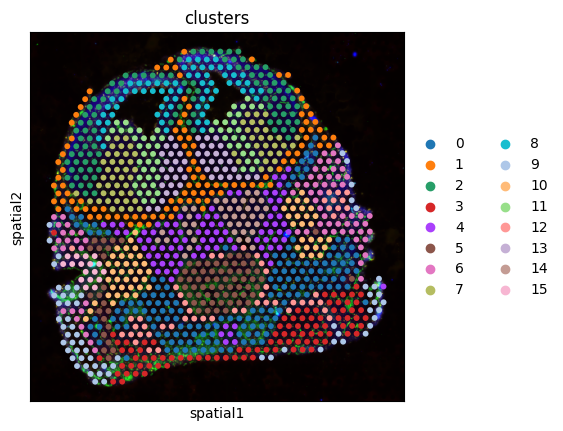

In [39]:
sc.pl.spatial(adata02, color='clusters')

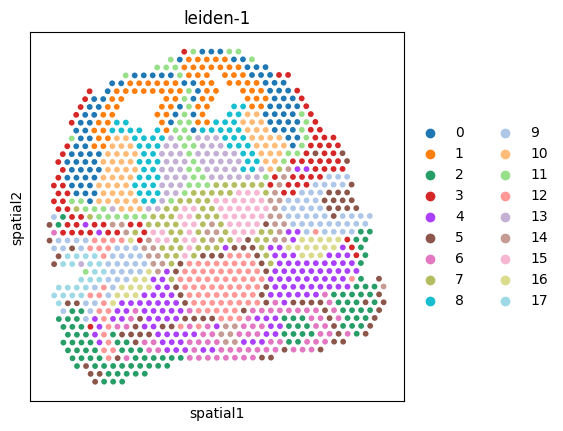

In [44]:
sc.pl.spatial(adata[adata.obs['batch'].isin(['Control02'])], color='leiden-1', spot_size=70)

In [56]:
def AUCell_UCAssign(adata:ad.AnnData, db:pd.DataFrame, celltype:str, alpha=10e-30, gene_col='official gene symbol'):
  annotation = {}
  for ct in celltype:
    candidates = []
    markerList = np.array(db[db['cell type'] ==ct][gene_col])
    markerList = list(set(markerList).intersection(set(adata.var_names)))
    adata = AUCell_calcUC(adata, markerList, ct)
    ucell = adata.obs[["leiden-1", f"UCell_{ct}"]]
    rank = ucell.groupby("leiden-1", observed=False).mean()
    rank = rank.sort_values(by=f"UCell_{ct}", ascending=False)
    rank = rank.reset_index()

    for i in range(len(rank)):
      anno = rank.iloc[i,0]
      sample1 = ucell.loc[ucell['leiden-1'].isin([anno]), f"UCell_{ct}"]
      sample2 = ucell.loc[~ucell['leiden-1'].isin([anno]), f"UCell_{ct}"]
      try:
        w = kruskal(sample1, sample2)
        if w.pvalue < alpha:
          candidates.append(anno)
          ucell = ucell[~ucell['leiden-1'].isin([anno])]
        else:
          break
      except ValueError as e:
        print(e)
        break
    if len(candidates) > 0:
      annotation[ct] = candidates
  adata.uns['UCell_Assign'] = annotation
  adata.obsm['AUCell_rankings'].columns = np.array(adata.obsm['AUCell_rankings'].columns, dtype=str)
  return adata
adata = AUCell_UCAssign(adata, db=panglaoDB, celltype=celltype, alpha=10e-40)

In [1]:
adata.uns['UCell_Assign']

NameError: name 'adata' is not defined

In [23]:
adata_sp = sc.read_h5ad("/data/rzh/RawUrls/235/sp/sp1.h5ad")


In [7]:
adata_sc = sc.read_h5ad("/data/rzh/RawUrls/235/sc/sc1.h5ad")

In [26]:
def Cell2Location_rg_sc(adata_sc, max_epoches=250, batch_size=2500, train_size=1, lr=0.002,
                        num_samples=1000, use_gpu=True):
    from cell2location.models import RegressionModel

    # prepare anndata for the regression model
    cell2location.models.RegressionModel.setup_anndata(adata=adata_sc,
                            # cell type, covariate used for constructing signatures
                            labels_key='annotation')

    # create and train the regression model
    mod = RegressionModel(adata_sc)
    # mod.view_anndata_setup()

    # Use all data for training (validation not implemented yet, train_size=1)
    mod.train(max_epochs=max_epoches, batch_size=batch_size, train_size=train_size, lr=lr)

    # plot ELBO loss history during training, removing first 20 epochs from the plot
    # mod.plot_history(20)

    # In this section, we export the estimated cell abundance (summary of the posterior distribution).
    adata_sc = mod.export_posterior(
        adata_sc, sample_kwargs={'num_samples': num_samples, 'batch_size': batch_size, 'use_gpu': use_gpu}
    )

    # export estimated expression in each cluster
    if 'means_per_cluster_mu_fg' in adata_sc.varm.keys():
        inf_aver = adata_sc.varm['means_per_cluster_mu_fg'][[f'means_per_cluster_mu_fg_{i}'
                                        for i in adata_sc.uns['mod']['factor_names']]].copy()
    else:
        inf_aver = adata_sc.var[[f'means_per_cluster_mu_fg_{i}'
                                        for i in adata_sc.uns['mod']['factor_names']]].copy()
    inf_aver.columns = adata_sc.uns['mod']['factor_names']
    return inf_aver


def Cell2Location_rg_sp(adata_sp, inf_aver, N_cells_per_location=30, detection_alpha=20,
                        max_epoches=10000, batch_size=None, train_size=1, lr=0.002,
                        num_samples=1000, use_gpu=True):
    # do spatial mapping
    # find shared genes and subset both anndata and reference signatures
    intersect = np.intersect1d(adata_sp.var_names, inf_aver.index)
    adata_sp = adata_sp[:, intersect].copy()
    inf_aver = inf_aver.loc[intersect, :].copy()
    # prepare anndata for cell2location model
    cell2location.models.Cell2location.setup_anndata(adata=adata_sp, batch_key="batch")

    # create and train the model
    mod = cell2location.models.Cell2location(
        adata_sp, cell_state_df=inf_aver,
        # the expected average cell abundance: tissue-dependent
        # hyper-prior which can be estimated from paired histology:
        N_cells_per_location=N_cells_per_location,
        # hyperparameter controlling normalisation of
        # within-experiment variation in RNA detection:
        detection_alpha=detection_alpha
    )
    # mod.view_anndata_setup()
    mod.train(max_epochs=max_epoches,
              # train using full data (batch_size=None)
              batch_size=batch_size,
              # use all data points in training because
              # we need to estimate cell abundance at all locations
              train_size=train_size,
              use_gpu=use_gpu)

    # plot ELBO loss history during training, removing first 100 epochs from the plot
    # mod.plot_history(1000)

    # In this section, we export the estimated cell abundance (summary of the posterior distribution).
    adata_sp = mod.export_posterior(
        adata_sp, sample_kwargs={'num_samples': num_samples, 'batch_size': mod.adata.n_obs, 'use_gpu': use_gpu}
    )

    # add 5% quantile, representing confident cell abundance, 'at least this amount is present',
    # to adata.obs with nice names for plotting
    adata_sp.obs[adata_sp.uns['mod']['factor_names']] = adata_sp.obsm['q05_cell_abundance_w_sf']
    return adata_sp


def Cell2Location_run(adata_sc, adata_sp, sc_max_epoches=250, sc_batch_size=2500, sc_train_size=1, sc_lr=0.002, sc_num_samples=1000,
                      N_cells_per_location=30, detection_alpha=20,
                      sp_max_epoches=10000, sp_batch_size=2500, sp_train_size=1, sp_lr=0.002, sp_num_samples=1000, use_gpu=True):
    inf_aver = Cell2Location_rg_sc(adata_sc, sc_max_epoches, sc_batch_size, sc_train_size,sc_lr,sc_num_samples, use_gpu)
    adata_sp = Cell2Location_rg_sp(adata_sp, inf_aver,
                                   N_cells_per_location=N_cells_per_location,
                                   detection_alpha=detection_alpha,
                                   max_epoches=sp_max_epoches,
                                   batch_size=sp_batch_size,
                                   train_size=sp_train_size,
                                   lr=sp_lr,
                                   num_samples=sp_num_samples,
                                   use_gpu=use_gpu)
    weight = adata_sp.obsm['q05_cell_abundance_w_sf']
    weight.columns = adata_sp.uns['mod']['factor_names']
    adata_sp.obsm['Cell2Location'] = weight
    return adata_sp

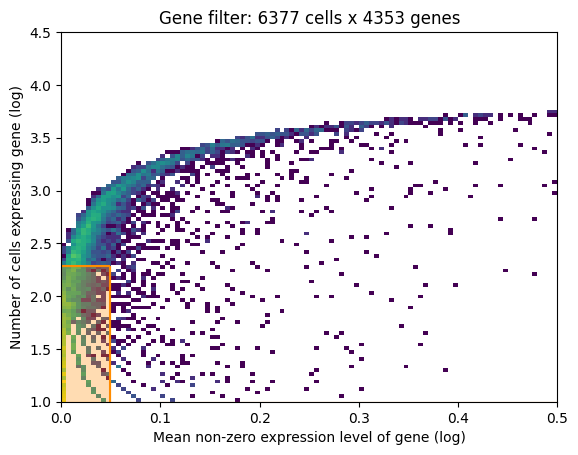

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/rzh/Browser/lib/python3.10/site-packages/lightning/pytorch/trainer/configuration_validator.py:69: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/rzh/Browser/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 250/250: 100%|██████████| 250/250 [01:10<00:00,  3.50it/s, v_num=1, elbo_train=1.57e+7]

`Trainer.fit` stopped: `max_epochs=250` reached.


Epoch 250/250: 100%|██████████| 250/250 [01:10<00:00,  3.56it/s, v_num=1, elbo_train=1.57e+7]

/home/rzh/Browser/lib/python3.10/site-packages/scvi/model/base/_pyromixin.py:388: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  _, _, device = parse_device_args(



Sampling global variables, sample: 100%|██████████| 999/999 [00:06<00:00, 145.25it/s]


In [18]:
# rename genes to ENSEMBL
adata_sc.var['SYMBOL'] = adata_sc.var.index
adata_sp.var['SYMBOL'] = adata_sp.var_names
adata_sp.var['gene_name'] = adata_sp.var_names
cell_count_cutoff=5
cell_percentage_cutoff2=0.03
nonz_mean_cutoff=1.12
adata_sc.X = adata_sc.layers['Raw']
selected = cell2location.utils.filtering.filter_genes(adata_sc,
                        cell_count_cutoff=cell_count_cutoff,
                        cell_percentage_cutoff2=cell_percentage_cutoff2,
                        nonz_mean_cutoff=nonz_mean_cutoff)
inf_aver = Cell2Location_rg_sc(adata_sc)

In [27]:
adata_sp.X = adata_sp.layers['Raw']
adata_sp = Cell2Location_rg_sp(adata_sp, inf_aver)

/home/rzh/Browser/lib/python3.10/site-packages/scvi/train/_trainrunner.py:76: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  accelerator, lightning_devices, device = parse_device_args(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/rzh/Browser/lib/python3.10/site-packages/lightning/pytorch/trainer/configuration_validator.py:69: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/rzh/Browser/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_e

Epoch 10000/10000: 100%|██████████| 10000/10000 [12:28<00:00, 13.80it/s, v_num=1, elbo_train=3.97e+6]

`Trainer.fit` stopped: `max_epochs=10000` reached.


Epoch 10000/10000: 100%|██████████| 10000/10000 [12:28<00:00, 13.36it/s, v_num=1, elbo_train=3.97e+6]

/home/rzh/Browser/lib/python3.10/site-packages/scvi/model/base/_pyromixin.py:388: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  _, _, device = parse_device_args(



Sampling global variables, sample: 100%|██████████| 999/999 [00:12<00:00, 79.71it/s]


In [35]:
adata_sp.write_h5ad("/data/rzh/RawUrls/235/sp/sp1.h5ad")

In [3]:
adata_sc = sc.read_h5ad("/data/rzh/RawUrls/235/sc/sc1.h5ad")
adata_sc

AnnData object with n_obs × n_vars = 6377 × 10965
    obs: 'batch', 'mt_frac', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden-1', 'UCell_Adrenergic neurons', 'UCell_Anterior pituitary gland cells', 'UCell_Astrocytes', 'UCell_Bergmann glia', 'UCell_Cajal-Retzius cells', 'UCell_Cholinergic neurons', 'UCell_Choroid plexus cells', 'UCell_Dopaminergic neurons', 'UCell_Ependymal cells', 'UCell_Erythroblasts', 'UCell_Erythroid-like and erythroid precursor cells', 'UCell_GABAergic neurons', 'UCell_Glutaminergic neurons', 'UCell_Glycinergic neurons', 'UCell_Immature neurons', 'UCell_Interneurons', 'UCell_Meningeal cells', 'UCell_Microglia', 'UCell_Motor neurons', 'UCell_Neural stem/precursor cells', 'UCell_Neuroblasts', 'UCell_Neuroendocrine cells', 'UCell_Neurons', 'UCell_Noradrenergic neurons', 'UCell_Oligodendrocyte progenitor cells', 'UCell_Oligodendrocytes', 'UCell_Pinealocytes', 'UCell_Platelets', 'UCell_Purkinje neurons', 'UCell_Pyramidal cells', 'UCell_Radial glia 

In [23]:
meta = pd.DataFrame(adata_sc.obs['annotation'].copy())
meta = meta.reset_index()
meta.columns=['Cell', 'cell_type']
meta.to_csv("/data/rzh/RawUrls/235/sc/meta.txt", sep='\t', index=False)

In [62]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_res = cpdb_statistical_analysis_method.call(
  cpdb_file_path="../resources/cellphonedb.zip",
  meta_file_path="../resources/meta.txt",
  counts_file_path="/data/rzh/RawUrls/235/sc/sc1.h5ad",
  counts_data='hgnc_symbol',
  output_path="../resources/cpdb",
  threads=16,
)
adata_sc.uns['CellphoneDB'] = cpdb_res
adata_sc

Reading user files...
The following user files were loaded successfully:
/data/rzh/RawUrls/235/sc/sc1.h5ad
../resources/meta.txt
[ ][CORE][19/04/24-11:57:41][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:16 Precision:3
[ ][CORE][19/04/24-11:57:41][INFO] Running Real Analysis
[ ][CORE][19/04/24-11:57:41][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [00:12<00:00, 78.79it/s]


[ ][CORE][19/04/24-11:57:55][INFO] Building Pvalues result
[ ][CORE][19/04/24-11:57:55][INFO] Building results
Saved deconvoluted to ../resources/cpdb/statistical_analysis_deconvoluted_04_19_2024_115755.txt
Saved deconvoluted_percents to ../resources/cpdb/statistical_analysis_deconvoluted_percents_04_19_2024_115755.txt
Saved means to ../resources/cpdb/statistical_analysis_means_04_19_2024_115755.txt
Saved pvalues to ../resources/cpdb/statistical_analysis_pvalues_04_19_2024_115755.txt
Saved significant_means to ../resources/cpdb/statistical_analysis_significant_means_04_19_2024_115755.txt


AnnData object with n_obs × n_vars = 6377 × 10965
    obs: 'batch', 'mt_frac', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden-1', 'UCell_Adrenergic neurons', 'UCell_Anterior pituitary gland cells', 'UCell_Astrocytes', 'UCell_Bergmann glia', 'UCell_Cajal-Retzius cells', 'UCell_Cholinergic neurons', 'UCell_Choroid plexus cells', 'UCell_Dopaminergic neurons', 'UCell_Ependymal cells', 'UCell_Erythroblasts', 'UCell_Erythroid-like and erythroid precursor cells', 'UCell_GABAergic neurons', 'UCell_Glutaminergic neurons', 'UCell_Glycinergic neurons', 'UCell_Immature neurons', 'UCell_Interneurons', 'UCell_Meningeal cells', 'UCell_Microglia', 'UCell_Motor neurons', 'UCell_Neural stem/precursor cells', 'UCell_Neuroblasts', 'UCell_Neuroendocrine cells', 'UCell_Neurons', 'UCell_Noradrenergic neurons', 'UCell_Oligodendrocyte progenitor cells', 'UCell_Oligodendrocytes', 'UCell_Pinealocytes', 'UCell_Platelets', 'UCell_Purkinje neurons', 'UCell_Pyramidal cells', 'UCell_Radial glia 

In [66]:
adata_sc.write_h5ad("../resources/sc1-sampled.h5ad")

TypeError: Can't implicitly convert non-string objects to strings

In [87]:
cpdb_res['significant_means']['rank']

2869    0.008
1724    0.008
1415    0.008
299     0.008
493     0.008
        ...  
2890    1.264
2892    1.264
2895    1.264
2901    1.264
49      1.264
Name: rank, Length: 818, dtype: float64

In [84]:
import simplejson
cpdb_json = {}
for col in cpdb_res['significant_means'].columns:
  cpdb_json[col] = list(cpdb_res['significant_means'][col])
cpdb_json.keys()
with open("../resources/significant_means.json", 'w', encoding='utf-8') as f:
    simplejson.dump(cpdb_json, f, indent=4, ensure_ascii=False, ignore_nan=True)

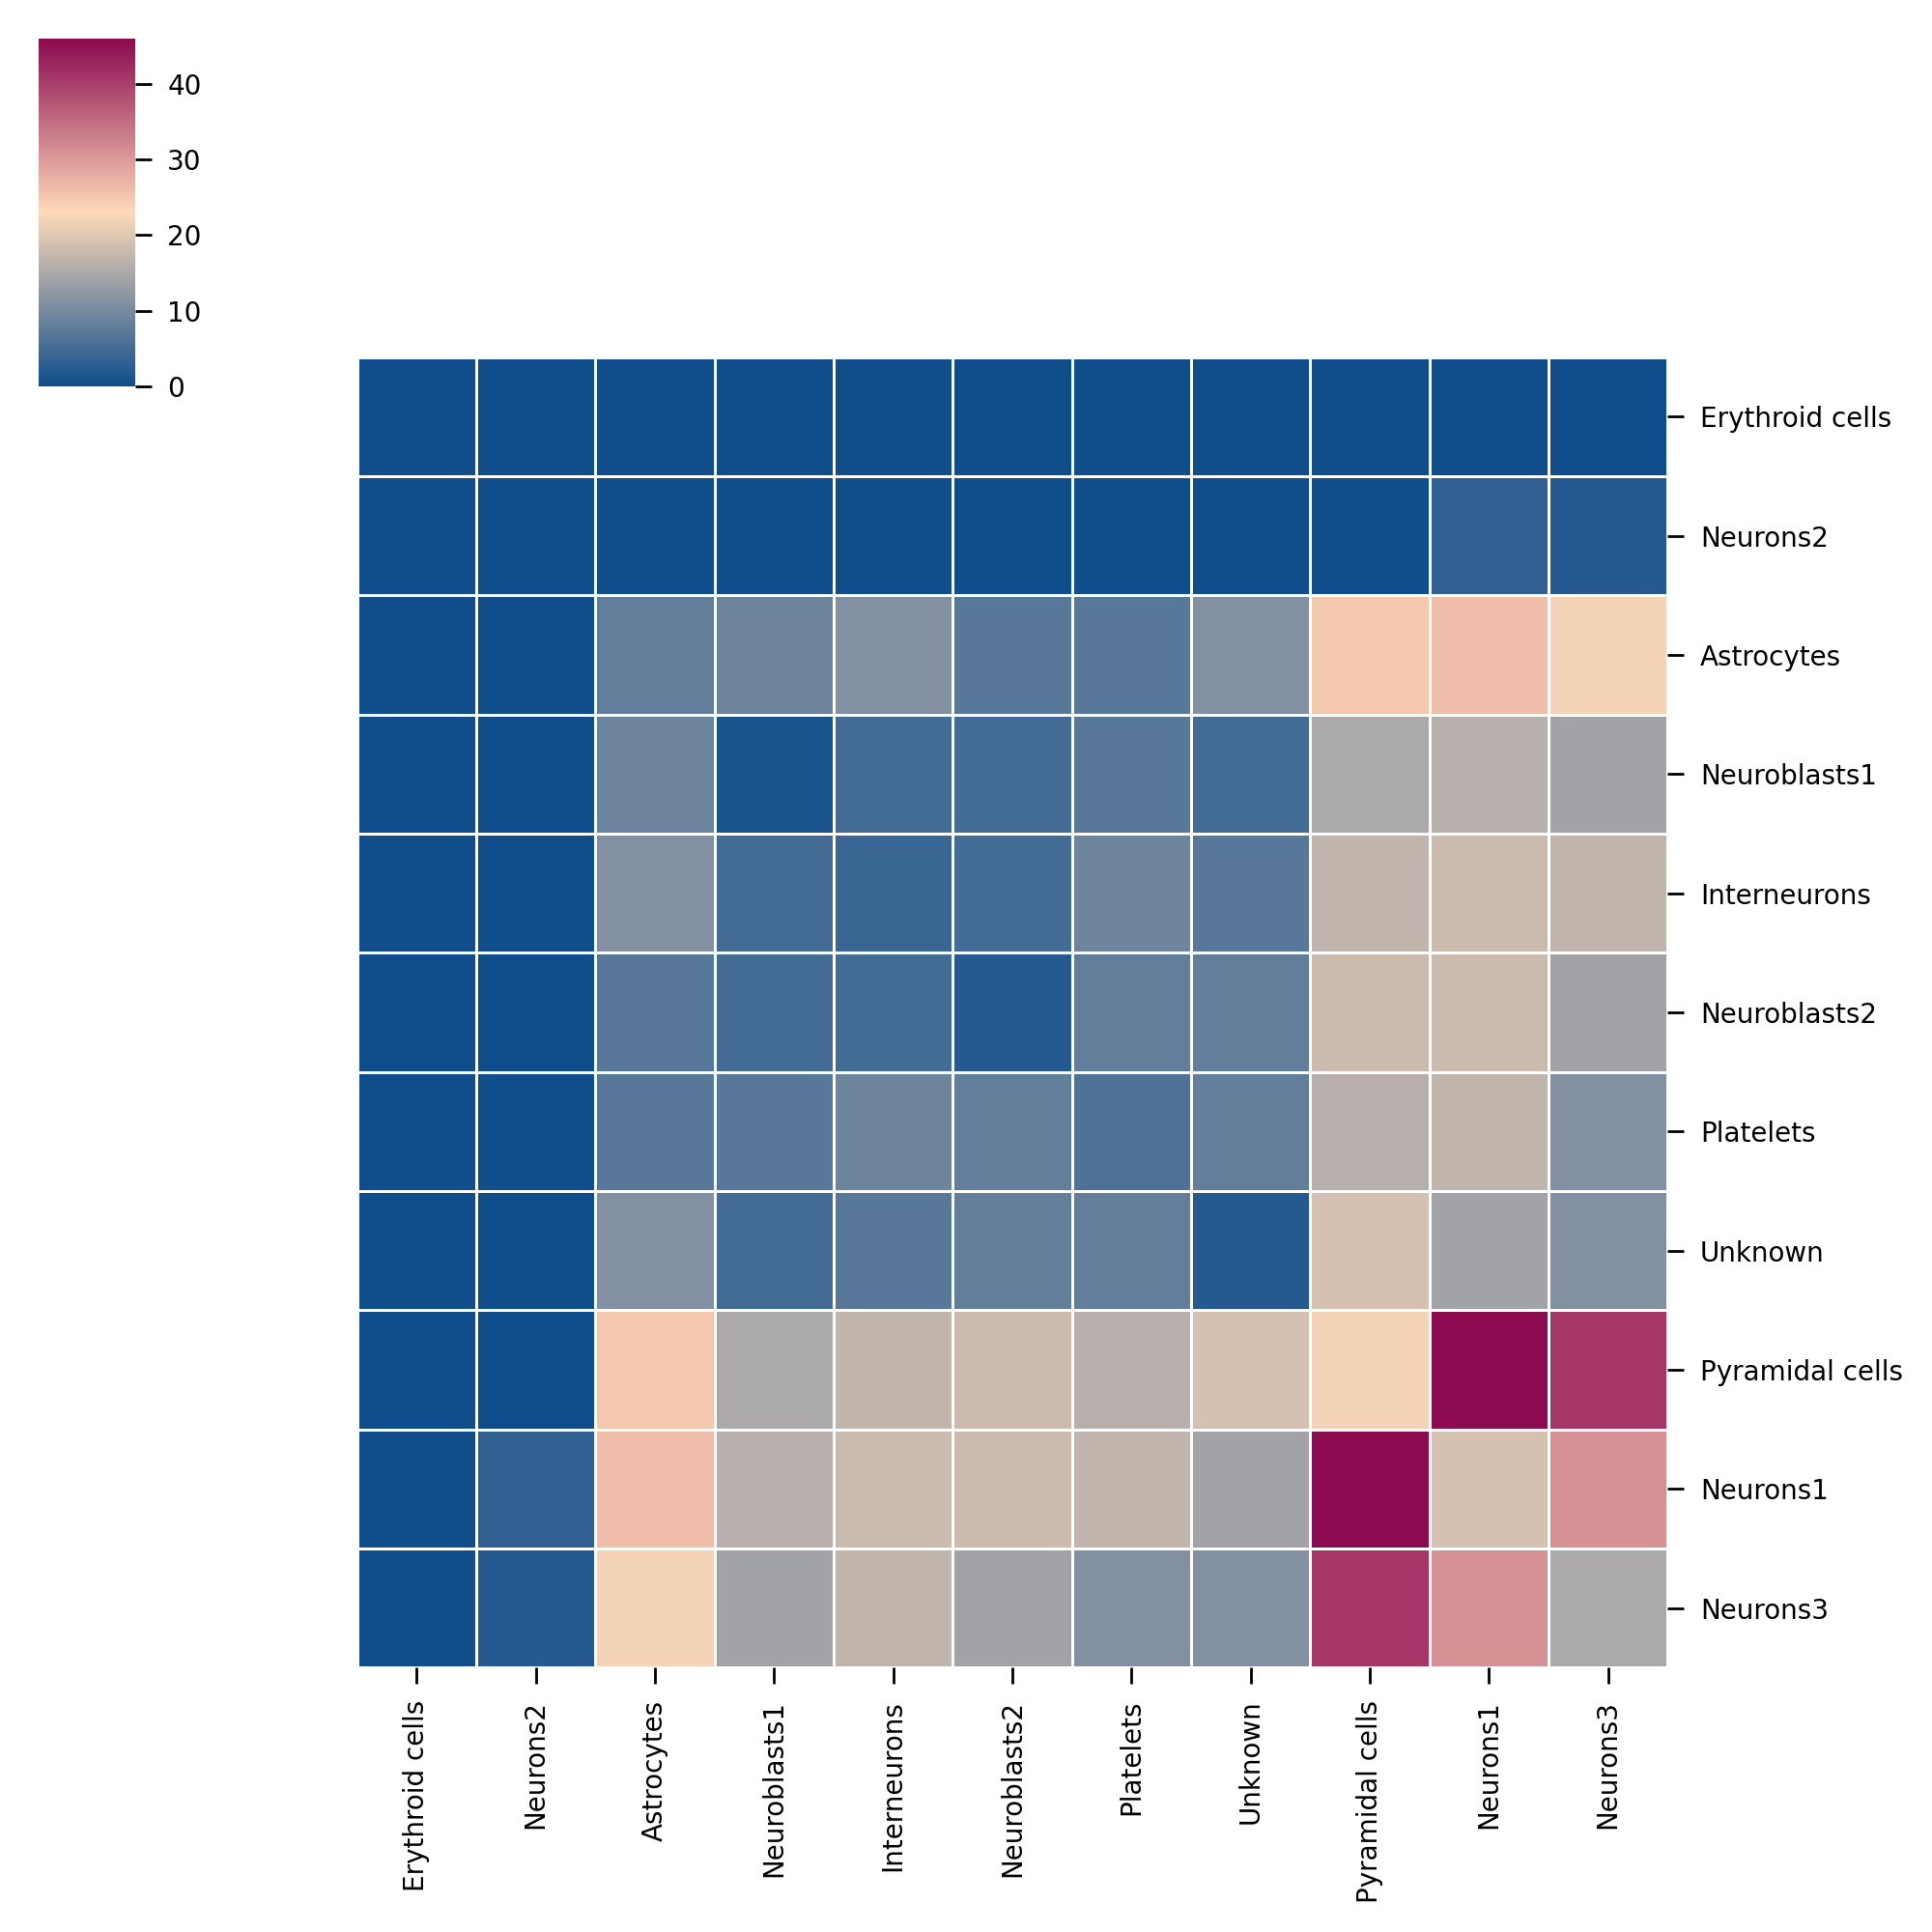

In [88]:
import ktplotspy as kpy

kpy.plot_cpdb_heatmap(pvals=cpdb_res['pvalues'],
                      cell_types=adata_sc.obs['annotation'])

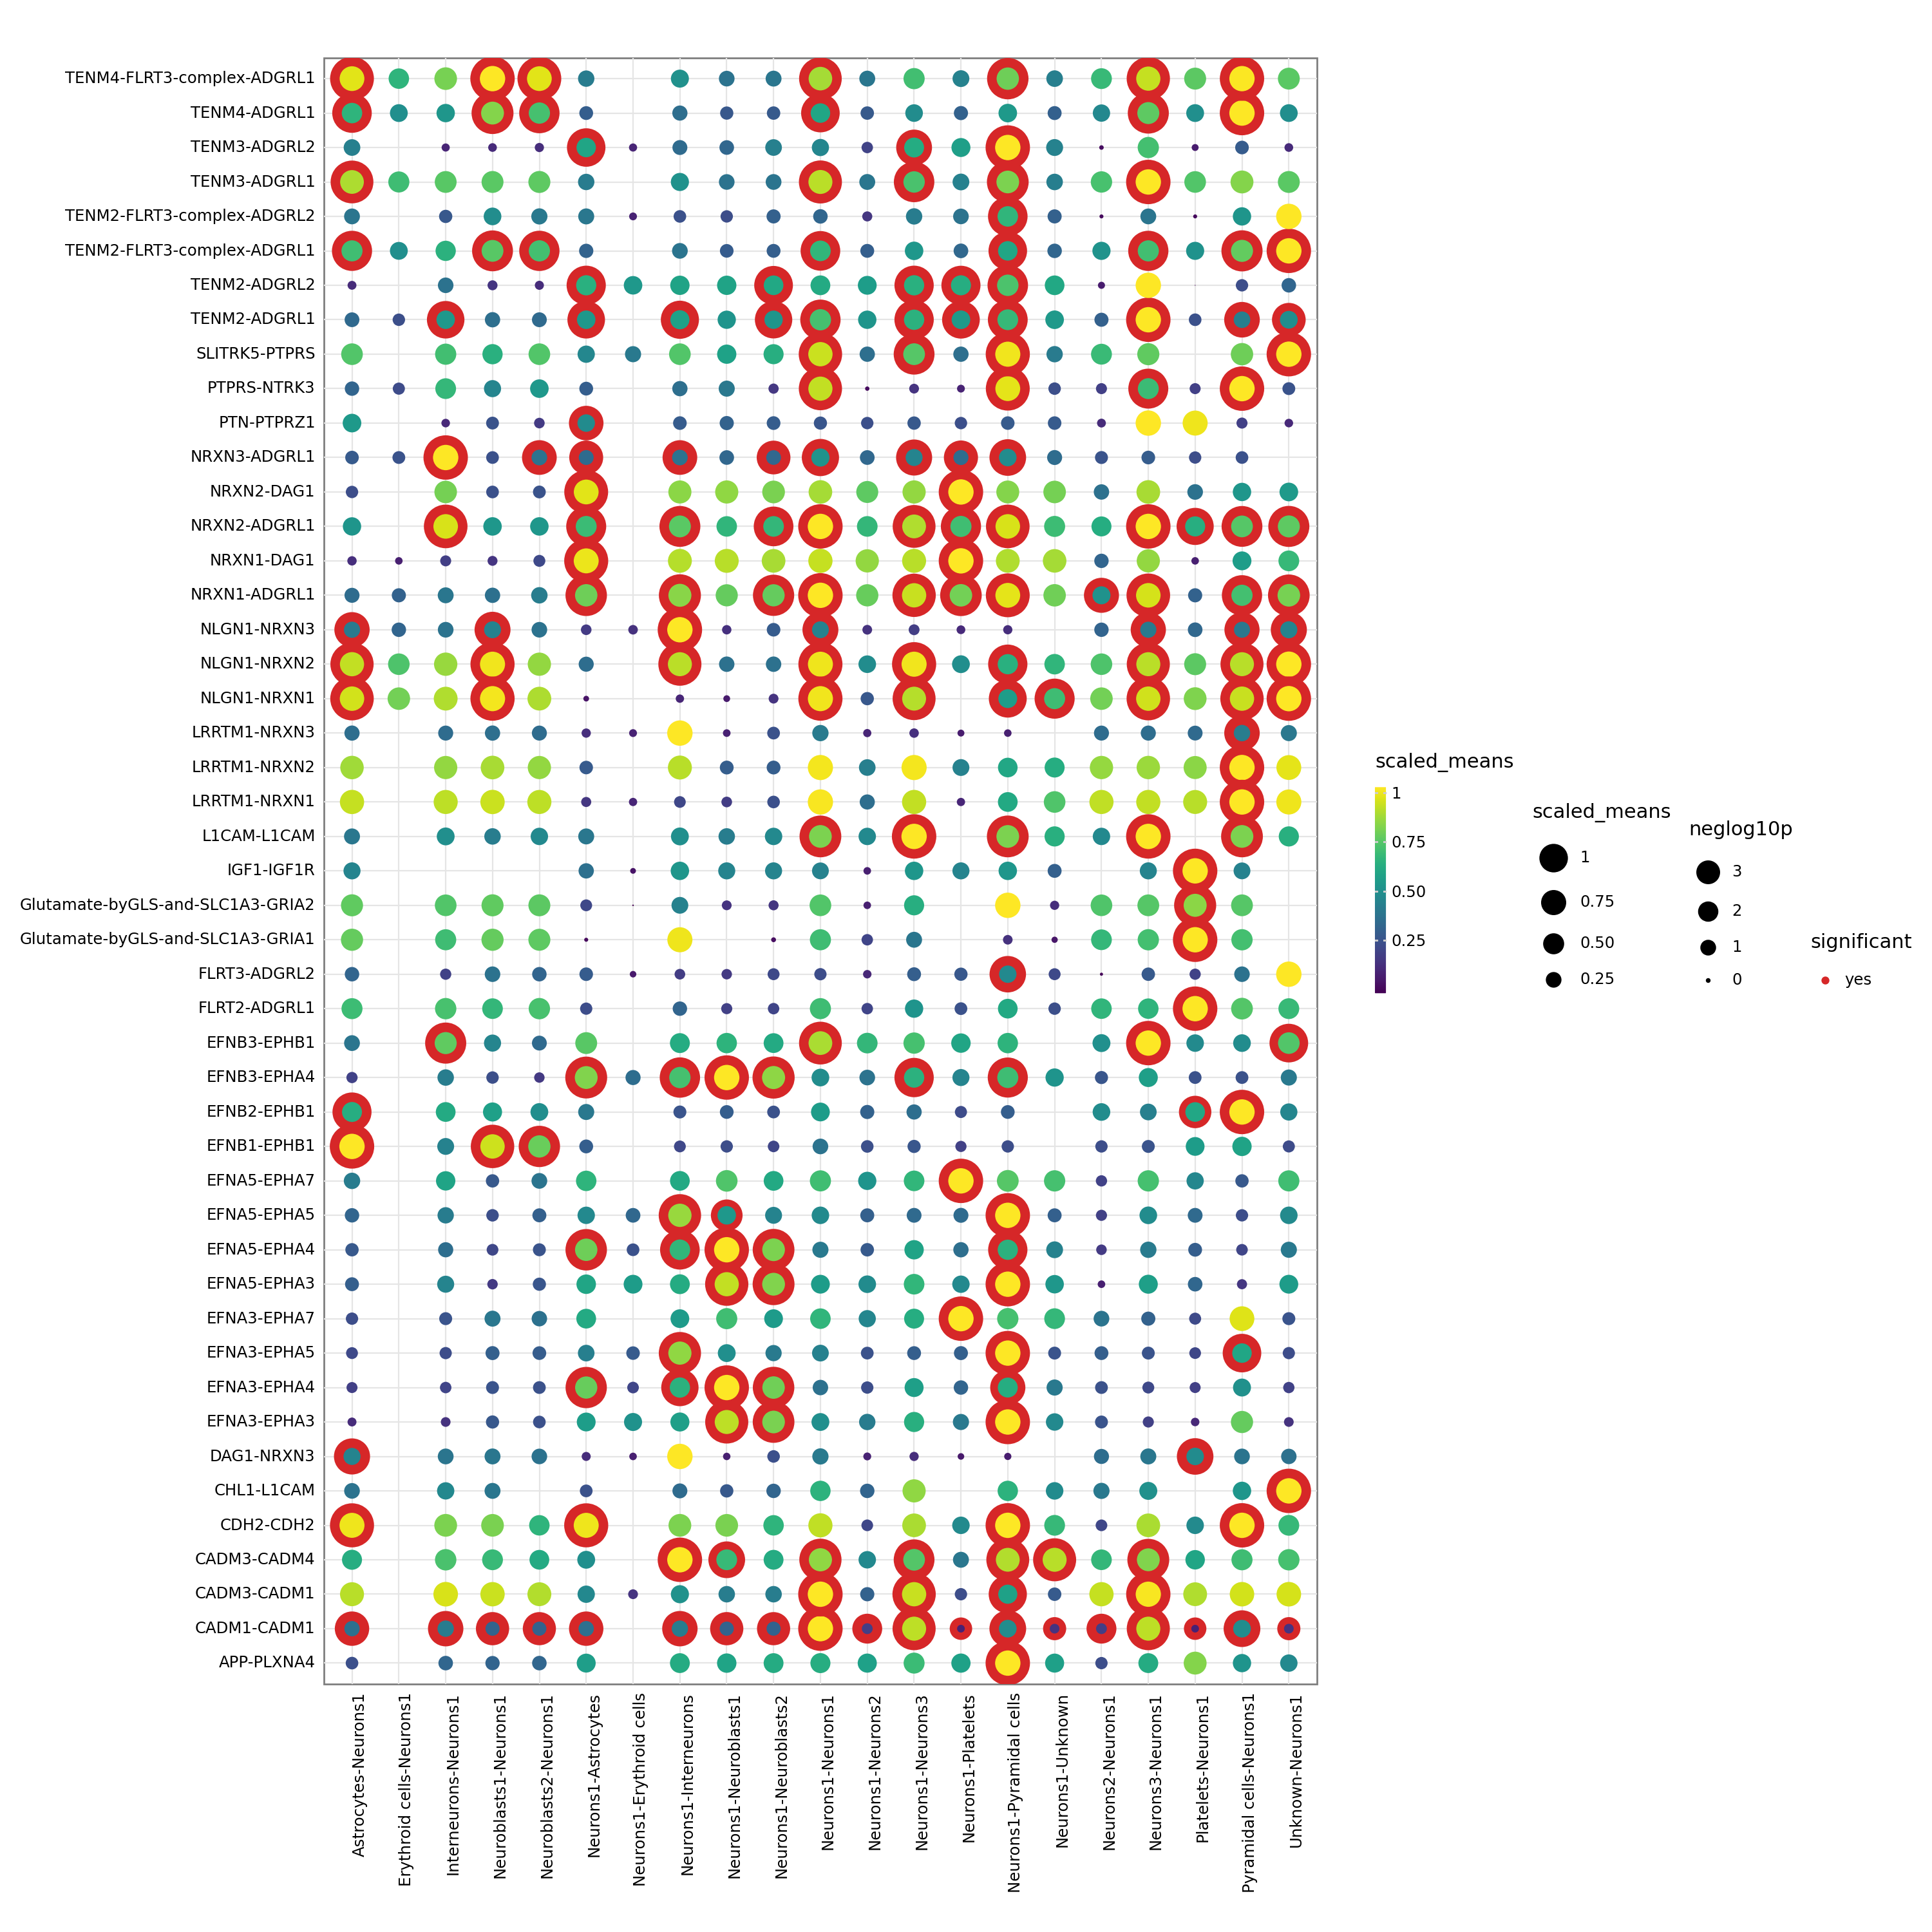

<Figure Size: (1500 x 1500)>

In [54]:
kpy.plot_cpdb(
  adata=adata_sc,
  cell_type1="Neurons1",
  cell_type2='.',
  means=cpdb_res['means'],
  pvals=cpdb_res['pvalues'],
  celltype_key='annotation',
  figsize=(15,15)
)

In [55]:
cpdb_res['pvalues']

id_cp_interaction interacting_pair      partner_a      partner_b gene_a  \
47     CPI-SS0EE09A201        CDH2_CDH2  simple:P19022  simple:P19022   CDH2   
49     CPI-SS0DA0F5556        CDH3_CDH3  simple:P22223  simple:P22223   CDH3   
51     CPI-SS0C53F7672        CDH6_CDH6  simple:P55285  simple:P55285   CDH6   
52     CPI-SS0BE3D537D        CDH7_CDH7  simple:Q9ULB5  simple:Q9ULB5   CDH7   
53     CPI-SS0889E281D      CADM1_CADM1  simple:Q9BY67  simple:Q9BY67  CADM1   
...                ...              ...            ...            ...    ...   
2883   CPI-SS0A612BCEF        KITLG_KIT  simple:P21583  simple:P10721  KITLG   
2890   CPI-SS09CEEE405      MPZL1_MPZL1  simple:O95297  simple:O95297  MPZL1   
2892   CPI-SS02B2C16ED      NELL2_ROBO3  simple:Q99435  simple:Q96MS0  NELL2   
2895   CPI-SS0E2453044         PPIA_BSG  simple:P62937  simple:P35613   PPIA   
2901   CPI-SS0F9F83827   PTPRD_IL1RAPL1  simple:P23468  simple:Q9NZN1  PTPRD   

        gene_b  secreted  receptor_a  receptor_b annotation_strategy  ...  \
47        CDH2     False       False       False             curated  ...   
49        CDH3     False       False       False             curated  ...   
51        CDH6     False       False       False             curated  ...   
52        CDH7     False       False       False             curated  ...   
53       CADM1     False       False       False             curated  ...   
...        ...       ...         ...         ...                 ...  ...   
2883       KIT      True       False        True             curated  ...   
2890     MPZL1     False       False       False             curated  ...   
2892     ROBO3      True       False        True             curated  ...   
2895       BSG      True       False       False             curated  ...   
2901  IL1RAPL1     False        True        True             curated  ...   

      Unknown|Erythroid cells Unknown|Interneurons Unknown|Neuroblasts1  \
47                        1.0                0.904                0.916   
49                        1.0                1.000                1.000   
51                        1.0                1.000                1.000   
52                        1.0                1.000                1.000   
53                        1.0                1.000                1.000   
...                       ...                  ...                  ...   
2883                      1.0                1.000                1.000   
2890                      1.0                1.000                1.000   
2892                      1.0                1.000                1.000   
2895                      1.0                1.000                1.000   
2901                      1.0                1.000                1.000   

      Unknown|Neuroblasts2  Unknown|Neurons1  Unknown|Neurons2  \
47                   0.992             0.780               1.0   
49                   1.000             1.000               1.0   
51                   1.000             1.000               1.0   
52                   1.000             1.000               1.0   
53                   1.000             0.032               1.0   
...                    ...               ...               ...   
2883                 1.000             1.000               1.0   
2890                 1.000             1.000               1.0   
2892                 1.000             1.000               1.0   
2895                 1.000             1.000               1.0   
2901                 1.000             1.000               1.0   

      Unknown|Neurons3  Unknown|Platelets  Unknown|Pyramidal cells  \
47               0.824                1.0                    0.584   
49               1.000                1.0                    1.000   
51               1.000                1.0                    1.000   
52               1.000                1.0                    1.000   
53               0.192                1.0                    1.000   
...  

In [3]:
import os
os.getcwd()

'/Users/rzh/Desktop/STpair/backend/server'

In [11]:
adata_sp = sc.read_h5ad("../resources/sp1-deconv.h5ad")

In [5]:
adata_sp

AnnData object with n_obs × n_vars = 4597 × 2000
    obs: 'in_tissue', 'array_row', 'array_col', 'X', 'Y', 'cell_type', 'Apical_vs_Basal_annotation', 'Cx_vs_LGE_annotation', 'LGE_VZ_vs_SVZ_annotation', 'batch', 'mt_frac', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden-1', 'UCell_Adrenergic neurons', 'UCell_Anterior pituitary gland cells', 'UCell_Astrocytes', 'UCell_Bergmann glia', 'UCell_Cajal-Retzius cells', 'UCell_Cholinergic neurons', 'UCell_Choroid plexus cells', 'UCell_Dopaminergic neurons', 'UCell_Ependymal cells', 'UCell_Erythroblasts', 'UCell_Erythroid-like and erythroid precursor cells', 'UCell_GABAergic neurons', 'UCell_Glutaminergic neurons', 'UCell_Glycinergic neurons', 'UCell_Immature neurons', 'UCell_Interneurons', 'UCell_Meningeal cells', 'UCell_Microglia', 'UCell_Motor neurons', 'UCell_Neural stem or precursor cells', 'UCell_Neuroblasts', 'UCell_Neuroendocrine cells', 'UCell_Neurons', 'UCell_Noradrenergic neurons', 'UCell_Oligodendrocyte progenitor

In [28]:
len(adata_sp.uns['rank_genes_groups']['names'])

17713

In [29]:
mdata_sp = ad.AnnData(obs=adata_sp.obs, obsm=adata_sp.obsm, var=adata_sp.var)
del mdata_sp.obsm['AUCell_rankings']
del mdata_sp.obsm['X_pca']
del mdata_sp.obsm['X_pca_harmony']
del mdata_sp.obs['in_tissue']
del mdata_sp.var['genome']
del mdata_sp.var['highly_variable']
del mdata_sp.var['dispersions']
del mdata_sp.var['dispersions_norm']
del mdata_sp.var['SYMBOL']
del mdata_sp.var['gene_name']
mdata_sp

AnnData object with n_obs × n_vars = 4597 × 2000
    obs: 'array_row', 'array_col', 'X', 'Y', 'cell_type', 'Apical_vs_Basal_annotation', 'Cx_vs_LGE_annotation', 'LGE_VZ_vs_SVZ_annotation', 'batch', 'mt_frac', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden-1', 'UCell_Adrenergic neurons', 'UCell_Anterior pituitary gland cells', 'UCell_Astrocytes', 'UCell_Bergmann glia', 'UCell_Cajal-Retzius cells', 'UCell_Cholinergic neurons', 'UCell_Choroid plexus cells', 'UCell_Dopaminergic neurons', 'UCell_Ependymal cells', 'UCell_Erythroblasts', 'UCell_Erythroid-like and erythroid precursor cells', 'UCell_GABAergic neurons', 'UCell_Glutaminergic neurons', 'UCell_Glycinergic neurons', 'UCell_Immature neurons', 'UCell_Interneurons', 'UCell_Meningeal cells', 'UCell_Microglia', 'UCell_Motor neurons', 'UCell_Neural stem or precursor cells', 'UCell_Neuroblasts', 'UCell_Neuroendocrine cells', 'UCell_Neurons', 'UCell_Noradrenergic neurons', 'UCell_Oligodendrocyte progenitor cells', 'UCe

In [30]:
mdata_sp.write_h5ad("../resources/sp1_meta.h5ad")

In [32]:
import numpy as np
import matplotlib as plt
from sklearn.metrics import r2_score

# 产生随机数,种子一定，产生的随机数不再真的“随机”
np.random.seed(42)
# 随机产生200*50的矩阵
n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# 阈值系数使它们非负，数据情景设定为非负
true_coef[true_coef < 0] = 0
# 2维矩阵和一个向量点乘
y = np.dot(X, true_coef)  # 200*50矩阵* 50*1向量
# 加入噪声/随机数，服从正态分布
y += 5 * np.random.normal(size=(n_samples,))

# 分数据为训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# 拟合非负最小二乘法NNLS
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)  # 此处使用
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)


NNLS R2 score 0.8225220806196525


In [33]:
adata_sc = sc.read_h5ad("../resources/sc1_sampled.h5ad")
adata_sc

AnnData object with n_obs × n_vars = 3000 × 2000
    obs: 'batch', 'mt_frac', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden-1', 'UCell_Adrenergic neurons', 'UCell_Anterior pituitary gland cells', 'UCell_Astrocytes', 'UCell_Bergmann glia', 'UCell_Cajal-Retzius cells', 'UCell_Cholinergic neurons', 'UCell_Choroid plexus cells', 'UCell_Dopaminergic neurons', 'UCell_Ependymal cells', 'UCell_Erythroblasts', 'UCell_Erythroid-like and erythroid precursor cells', 'UCell_GABAergic neurons', 'UCell_Glutaminergic neurons', 'UCell_Glycinergic neurons', 'UCell_Immature neurons', 'UCell_Interneurons', 'UCell_Meningeal cells', 'UCell_Microglia', 'UCell_Motor neurons', 'UCell_Neural stem or precursor cells', 'UCell_Neuroblasts', 'UCell_Neuroendocrine cells', 'UCell_Neurons', 'UCell_Noradrenergic neurons', 'UCell_Oligodendrocyte progenitor cells', 'UCell_Oligodendrocytes', 'UCell_Pinealocytes', 'UCell_Platelets', 'UCell_Purkinje neurons', 'UCell_Pyramidal cells', 'UCell_Radial gli

In [67]:
ucells = [s for s in adata_sc.obs.columns if s.startswith('UCell_')]
ucells.append('annotation')
df_sc = adata_sc.obs[ucells]
A = df_sc.groupby(by='annotation').mean().T
A

annotation                                          Astrocytes  \
UCell_Adrenergic neurons                              0.000336   
UCell_Anterior pituitary gland cells                  0.008339   
UCell_Astrocytes                                      0.028834   
UCell_Bergmann glia                                   0.032856   
UCell_Cajal-Retzius cells                             0.010664   
UCell_Cholinergic neurons                             0.001688   
UCell_Choroid plexus cells                            0.001092   
UCell_Dopaminergic neurons                            0.002099   
UCell_Ependymal cells                                 0.029948   
UCell_Erythroblasts                                   0.013402   
UCell_Erythroid-like and erythroid precursor cells    0.041340   
UCell_GABAergic neurons                               0.010268   
UCell_Glutaminergic neurons                           0.051747   
UCell_Glycinergic neurons                             0.001204   
UCell_Immature neurons                                0.024813   
UCell_Interneurons                                    0.006520   
UCell_Meningeal cells                                 0.056148   
UCell_Microglia                                       0.008821   
UCell_Motor neurons                                   0.009924   
UCell_Neural stem or precursor cells                  0.039293   
UCell_Neuroblasts                                     0.024969   
UCell_Neuroendocrine cells                            0.001729   
UCell_Neurons                                         0.011588   
UCell_Noradrenergic neurons                           0.000000   
UCell_Oligodendrocyte progenitor cells                0.032822   
UCell_Oligodendrocytes                                0.011709   
UCell_Pinealocytes                                    0.002466   
UCell_Platelets                                       0.021857   
UCell_Purkinje neurons                                0.002759   
UCell_Pyramidal cells                                 0.010950   
UCell_Radial glia cells                               0.053198   
UCell_Reticulocytes                                   0.002377   
UCell_Retinal ganglion cells                          0.004050   
UCell_Satellite glial cells                           0.018820   
UCell_Schwann cells                                   0.048593   
UCell_Serotonergic neurons                            0.000000   
UCell_Tanycytes                                       0.030760   
UCell_Trigeminal neurons                              0.002718   

annotation                                          Erythroid cells  \
UCell_Adrenergic neurons                                   0.000000   
UCell_Anterior pituitary gland cells                       0.000000   
UCell_Astrocytes                                           0.006683   
UCell_Bergmann glia                                        0.010778   
UCell_Cajal-Retzius cells                                  0.023575   
UCell_Cholinergic neurons                                  0.091674   
UCell_Choroid plexus cells                                 0.000000   
UCell_Dopaminergic neurons                                 0.004165   
UCell_Ependymal cells                                      0.035266   
UCell_Erythroblasts                                        0.019586   
UCell_Erythroid-like and erythroid precursor cells         0.253986   
UCell_GABAergic neurons                                    0.000000   
UCell_Glutaminergic neurons                                0.004684   
UCell_Glycinergic neurons                                  0.000000   
UCell_Immature neurons                                     0.033037   
UCell_Interneurons                                         0.017959   
UCell_Meningeal cells                                      0.047283   
UCell_Microglia                                            0.014243   
UCell_Motor neurons                                        0.155200   
UCell

In [68]:
df_sp = adata_sp.obs[[s for s in adata_sc.obs.columns if s.startswith('UCell_')]].T
df_sp

AAACATTTCCCGGATT-1-Control02  \
UCell_Adrenergic neurons                                                0.000000   
UCell_Anterior pituitary gland cells                                    0.036952   
UCell_Astrocytes                                                        0.021826   
UCell_Bergmann glia                                                     0.025540   
UCell_Cajal-Retzius cells                                               0.023336   
UCell_Cholinergic neurons                                               0.000000   
UCell_Choroid plexus cells                                              0.000000   
UCell_Dopaminergic neurons                                              0.000000   
UCell_Ependymal cells                                                   0.010006   
UCell_Erythroblasts                                                     0.013681   
UCell_Erythroid-like and erythroid precursor cells                      0.033862   
UCell_GABAergic neurons                                                 0.000000   
UCell_Glutaminergic neurons                                             0.000000   
UCell_Glycinergic neurons                                               0.000000   
UCell_Immature neurons                                                  0.000000   
UCell_Interneurons                                                      0.010843   
UCell_Meningeal cells                                                   0.187752   
UCell_Microglia                                                         0.004446   
UCell_Motor neurons                                                     0.000000   
UCell_Neural stem or precursor cells                                    0.034503   
UCell_Neuroblasts                                                       0.019696   
UCell_Neuroendocrine cells                                              0.033073   
UCell_Neurons                                                           0.016023   
UCell_Noradrenergic neurons                                             0.000000   
UCell_Oligodendrocyte progenitor cells                                  0.034379   
UCell_Oligodendrocytes                                                  0.012601   
UCell_Pinealocytes                                                      0.000000   
UCell_Platelets                                                         0.037201   
UCell_Purkinje neurons                                                  0.000000   
UCell_Pyramidal cells                                                   0.026310   
UCell_Radial glia cells                                                 0.000000   
UCell_Reticulocytes                                                     0.000000   
UCell_Retinal ganglion cells                                            0.009541   
UCell_Satellite glial cells                                             0.000000   
UCell_Schwann cells                                                     0.022377   
UCell_Serotonergic neurons                                              0.000000   
UCell_Tanycytes                                                         0.113994   
UCell_Trigeminal neurons                                                0.000000   

                                                    AAACCGTTCGTCCAGG-1-Control02  \
UCell_Adrenergic neurons                                                0.000000   
UCell_Anterior pituitary gland cells                                    0.061530   
UCell_Astrocytes                                                        0.039072   
UCell_Bergmann glia                                                     0.046094   
UCell_Cajal-Retzius cells                                               0.000000   
UCell_Cholinergic neurons                                               0.000000   
UCell_Choroid plexus cells                                              0.000000   
UCell_Dopaminergic neurons                                              0.000000   
UCell_Ependymal cel

In [69]:
reg_nnls = LinearRegression(positive=True)  # 此处使用
y_pred_nnls = reg_nnls.fit(A, df_sp)

In [65]:
np.shape(y_pred_nnls.coef_)

(4597, 11)

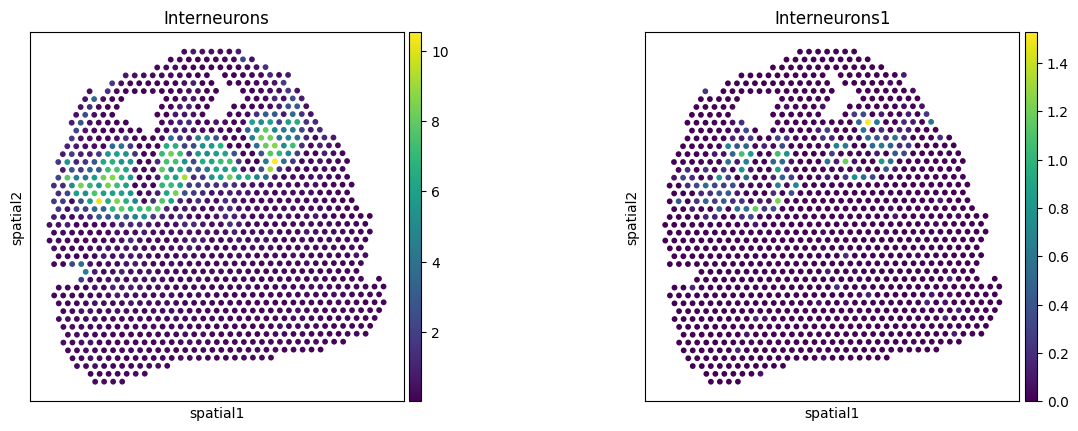

In [71]:
adata_sp.obs['Interneurons1'] = y_pred_nnls.coef_[:, 2]
sc.pl.spatial(adata_sp[adata_sp.obs['batch']=="Control02"], color=['Interneurons', 'Interneurons1'], spot_size=70)

In [73]:
from gseapy import Biomart
bm = Biomart()
# note the dataset and attribute names are different
m2h = bm.query(dataset='mmusculus_gene_ensembl',
               attributes=['ensembl_gene_id','external_gene_name',
                           'hsapiens_homolog_ensembl_gene',
                           'hsapiens_homolog_associated_gene_name'])

h2m = bm.query(dataset='hsapiens_gene_ensembl',
               attributes=['ensembl_gene_id','external_gene_name',
                           'mmusculus_homolog_ensembl_gene',
                           'mmusculus_homolog_associated_gene_name'])

KeyboardInterrupt: 

In [74]:
import gseapy as gp

In [76]:
from gseapy import Msigdb
msig = Msigdb()
# mouse hallmark gene sets
gmt = msig.get_gmt(category='mh.all', dbver="2023.2.Mm")

In [79]:
len(msig.list_category(dbver="2023.2.Hs"))

34

In [83]:
gmt = msig.get_gmt(category='mh.all', dbver="2023.2.Mm")
len(gmt.keys())

50

In [85]:
gp.get_library_name(organism='Yeast')

['Cellular_Component_AutoRIF',
 'Cellular_Component_AutoRIF_Predicted_zscore',
 'GO_Biological_Process_2018',
 'GO_Biological_Process_AutoRIF',
 'GO_Biological_Process_AutoRIF_Predicted_zscore',
 'GO_Cellular_Component_2018',
 'GO_Cellular_Component_AutoRIF',
 'GO_Cellular_Component_AutoRIF_Predicted_zscore',
 'GO_Molecular_Function_2018',
 'GO_Molecular_Function_AutoRIF',
 'GO_Molecular_Function_AutoRIF_Predicted_zscore',
 'Gene_Interaction_Hubs_BioGRID_2018',
 'InterPro_Domains_2019',
 'KEGG_2018',
 'KEGG_2019',
 'PPI_Hubs_BioGRID_2018',
 'Pfam_Domains_2019',
 'Phenotype_AutoRIF',
 'Phenotype_AutoRIF_Predicted_zscore',
 'TF2DNA_2018',
 'WikiPathways_2018']

In [98]:
go_mf = gp.get_library(name='GO_Molecular_Function_2018', organism='Mouse')
go_mf

{'semaphorin receptor activity (GO:0017154)': ['NRP1',
  'NELL2',
  'PLXNC1',
  'PLXND1',
  'PLXNA3',
  'PLXNA2',
  'PLXNB3',
  'PLXNA1',
  'PLXNB2',
  'PLXNB1',
  'PLXNA4'],
 '7SK snRNA binding (GO:0097322)': ['HEXIM2',
  'CDK9',
  'HEXIM1',
  'CCNT2',
  'CCNT1',
  'DDX21'],
 'androgen receptor binding (GO:0050681)': ['NCOA3',
  'KDM4C',
  'DAXX',
  'NCOA1',
  'PRMT2',
  'NCOA4',
  'ARID5A',
  'FOXH1',
  'WIPI1',
  'PRKCB',
  'PIAS1',
  'SMARCA4',
  'PIAS2',
  'FOXP1',
  'PRPF6',
  'SNW1',
  'CDK7',
  'CCNE1',
  'PKN1',
  'CALR',
  'RAN',
  'KDM3A',
  'RB1',
  'KDM5D',
  'DDX5',
  'KDM1A',
  'RNF14',
  'TGFB1I1',
  'CTNNB1',
  'FHL2',
  'BRCA1',
  'PARK7',
  'TCF21',
  'RNF6',
  'RNF4',
  'GRIP1',
  'NRIP1',
  'KAT5',
  'NSD1',
  'EP300',
  'PPARGC1A',
  'TRIM68'],
 'transcription regulatory region DNA binding (GO:0044212)': ['ZNF281',
  'FOXH1',
  'RFX3',
  'RUNX1',
  'SOX12',
  'SMARCA2',
  'SOX11',
  'CCAR1',
  'HNRNPL',
  'RFX6',
  'CDK12',
  'TFAM',
  'CDK13',
  'BCOR',
  'ZNF831

In [102]:
glist = list(adata_sc.var_names)
enr_bg = gp.enrich(gene_list=glist,
                 gene_sets=gmt,
                 # organism='human', # organism argment is ignored because user input a background
                 background=None,
                 outdir=None, # don't write to disk
                )

ValueError: No objects to concatenate

In [100]:
enr_bg.results.head() 

Gene_set                                               Term Overlap  \
0  gs_ind_0  1-acylglycerol-3-phosphate O-acyltransferase a...    1/18   
1  gs_ind_0        1-phosphatidylinositol binding (GO:0005545)    5/14   
2  gs_ind_0  1-phosphatidylinositol-3-kinase activity (GO:0...    7/43   
3  gs_ind_0  1-phosphatidylinositol-3-kinase regulator acti...     1/6   
4  gs_ind_0  1-phosphatidylinositol-4-phosphate 5-kinase ac...     1/6   

    P-value  Adjusted P-value  Odds Ratio  Combined Score  \
0  0.859081          0.944557    0.744999        0.113159   
1  0.010428          0.211716    5.053057       23.058337   
2  0.148956          0.653460    1.791756        3.411692   
3  0.479429          0.882574    2.373224        1.744698   
4  0.479429          0.882574    2.373224        1.744698   

                                     Genes  
0                                   AGPAT1  
1             SNX10;ZFYVE1;EEA1;WDFY1;SYT1  
2  FGF9;FGF8;FGFR2;PIK3R4;FGF7;PIK3R1;GRB2  
3                                   PIK3R1  
4                                  PIKFYVE

In [108]:
msig.list_dbver()

Name     Last modified
0         6.0  2018-12-17 16:29
1         6.1  2018-12-17 16:29
2         6.2  2018-12-17 16:29
3         7.0  2020-01-27 04:43
4         7.1  2020-03-30 16:55
5         7.2  2020-09-18 23:33
6         7.3  2021-03-22 15:09
7         7.4  2021-04-02 14:38
8       7.5.1  2023-03-09 19:38
9         7.5  2022-01-13 01:00
10  2022.1.Hs  2023-03-09 19:37
11  2022.1.Mm  2023-03-09 19:37
12  2023.1.Hs  2023-08-19 15:08
13  2023.1.Mm  2023-08-19 15:09
14  2023.2.Hs  2023-10-21 01:29
15  2023.2.Mm  2023-10-20 08:32

In [109]:
msig.list_category(dbver="2023.2.Mm")

['m1.all',
 'm2.all',
 'm2.cgp',
 'm2.cp.biocarta',
 'm2.cp.reactome',
 'm2.cp',
 'm2.cp.wikipathways',
 'm3.all',
 'm3.gtrd',
 'm3.mirdb',
 'm5.all',
 'm5.go.bp',
 'm5.go.cc',
 'm5.go.mf',
 'm5.go',
 'm5.mpt',
 'm8.all',
 'mh.all',
 'msigdb']

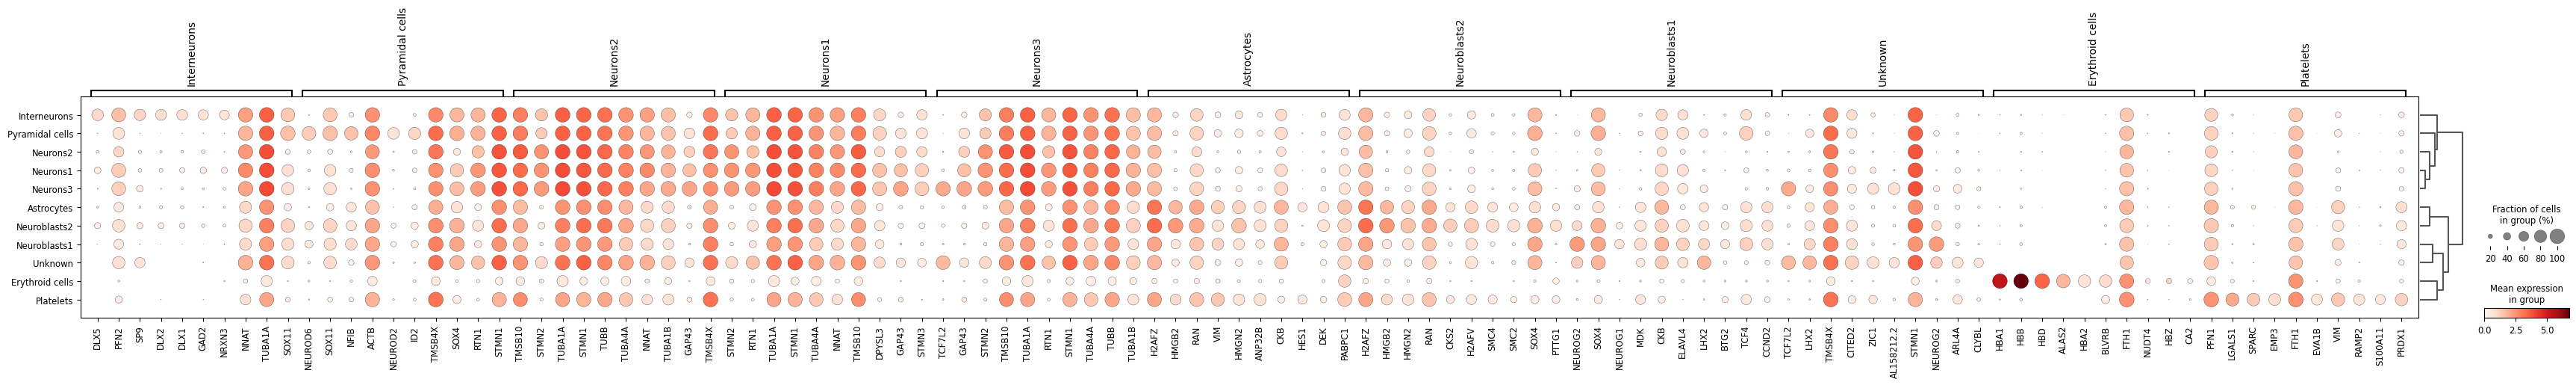

In [89]:
sc.tl.rank_genes_groups(adata_sc, groupby='annotation')
sc.pl.rank_genes_groups_dotplot(adata_sc)

In [90]:
import time
t1 = time.time()
# NOTE: To speed up, use gp.prerank instead with your own ranked list.
res = gp.gsea(data=adata_sc.to_df().T, # row -> genes, column-> samples
        gene_sets="GO_Biological_Process_2021",
        cls_sc=adata.obs['annotation'],
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

2024-04-27 21:44:10,490 [INFO] Input dict object named with gs_ind_0
2024-04-27 21:44:10,491 [INFO] Run: gs_ind_0 
2024-04-27 21:44:10,513 [INFO] Background is not set! Use all 3412 genes in gs_ind_0.
2024-04-27 21:44:10,514 [INFO] No hits return, for gene set: Custom13041947200


ValueError: No objects to concatenate

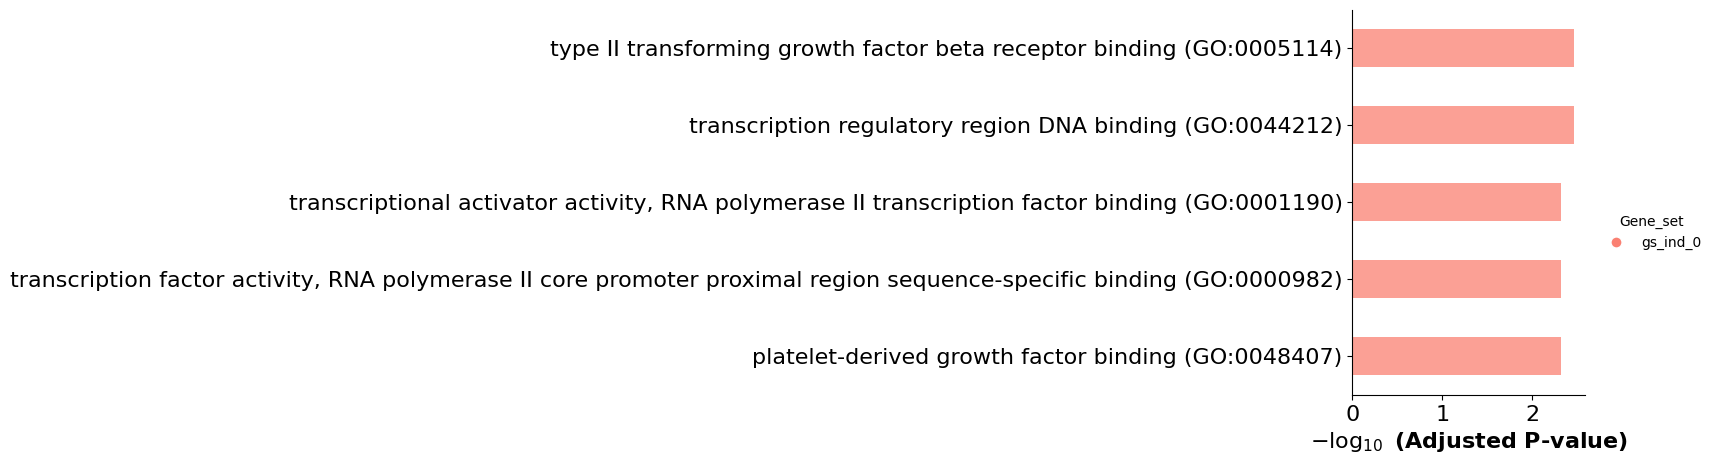

In [113]:
from gseapy import barplot, dotplot
ax = barplot(enr_bg.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              #color=['darkred', 'darkblue'] # set colors for group
              color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )